# Libraries

In [1]:
import numpy as np
import numpy.linalg as linalg
import pandas as pd
from scipy.spatial import Delaunay

import matplotlib.pyplot as plt
from tabulate import tabulate

# My Libraries


In [2]:
from libraries.Spectrum import *
from libraries.MyPlot import *
import libraries.MyMath as mm
import libraries.MyOutput as output
from scipy.spatial import Delaunay, delaunay_plot_2d

# Start Timer

In [3]:
import time

program_time = time.time()

# Initial Data

In [26]:
OUTPUT = 1  # OUT PUT MODE => 0 = Terminal Output, 1 = File Output

MUNSELL_FOR_EIGEN = 1  # 0 = Use created lookup table for eigen vectors calculation, 1 = Use Munsell for eigen vectors calculation

MUNSELL_AS_SAMPLE = (
    0  # 0 = Create samples manually from dyes, 1 = Use Munsell as samples
)

PLOT_ALL_SAMPLES = (
    0  # 0 = Don't plot all samples comparison, 1 = Plot all samples comparison
)

MUTUAL_SAMPLES = 0  # 0 = Examine all possible samples for each method, 1 = Examine samples which are valid in both methods

ANALYZE_MODE = (
    0  # 0 = No analyze on samples, 1 = Show analyze for top best and top worst samples
)

precise = 5  # Final output precise

dim = 3  # Dimension of PCC

interval = "Normal"  # Normal => 11 points, Small => 100 points

Multi_Interpolation = 0  # 0 => Using one global LUT, 1 => Using multiple LUT

if OUTPUT:
    makeout()
    output.makeout()

start_wave, end_wave = 400, 700
data_size = 31
distance = (end_wave - start_wave) / (data_size - 1)

blue_sample_num, yellow_sample_num, red_sample_num = 7, 7, 7

"""
Creating Wave lengths array for plots
Creating Example Data for checking plots
"""
# [400, 410, 420, ..., 700]
wave_length = mm.array_distance(400, distance, 700)

# [1, 1, 1, ..., 1]
example_data = mm.array_repeat(1, data_size)

"""
Start Getting Data From Excel file
"""
data = pd.read_excel("data/data.xls")

extract_data = pd.DataFrame(data, columns=["c"])
c = extract_data.to_numpy()
c = mm.cleanNaN(c)

R_red = []
for i in range(1, red_sample_num + 1):
    extract_data = pd.DataFrame(data, columns=["r" + str(i)])
    R_red.append(extract_data.to_numpy())

R_yellow = []
for i in range(1, yellow_sample_num + 1):
    extract_data = pd.DataFrame(data, columns=["y" + str(i)])
    R_yellow.append(extract_data.to_numpy())

R_blue = []
for i in range(1, blue_sample_num + 1):
    extract_data = pd.DataFrame(data, columns=["b" + str(i)])
    R_blue.append(extract_data.to_numpy())


extract_data = pd.DataFrame(data, columns=["Rsub"])
R_sub = extract_data.to_numpy()
k_sub = mm.applyFunction(R_sub, find_KOVERS)

extract_data = pd.DataFrame(data, columns=["Rstd"])
R_std = extract_data.to_numpy()
k_std = mm.applyFunction(R_std, find_KOVERS)

extract_data = pd.DataFrame(data, columns=["xbar"])
xbar = extract_data.to_numpy()

extract_data = pd.DataFrame(data, columns=["ybar"])
ybar = extract_data.to_numpy()

extract_data = pd.DataFrame(data, columns=["zbar"])
zbar = extract_data.to_numpy()

viewer = Viewer(xbar, ybar, zbar)

extract_data = pd.DataFrame(data, columns=["D65"])
E_D65 = extract_data.to_numpy()
light_source = LightSource(E_D65)

# Principal Component Analysis
munsell_size = 1269
munsell_R = []
data = pd.read_excel("data/Munsell400_10_700.xlsx")
for i in range(munsell_size):
    newdata = data[data.columns[i]]
    newdata = newdata.to_numpy()
    munsell_R.append(newdata)
munsell_R = np.array(munsell_R).T

R_mean = np.array([[sum(row) for row in munsell_R]])
R_mean = R_mean.T / munsell_size

munsell_D = []
for mat in munsell_R.T:
    arr = mm.sum([mat, -1 * R_mean.T[0]])
    munsell_D.append(arr)
munsell_D = np.array(munsell_D)
munsell_D = munsell_D.T
print(len(munsell_D))

31


# K OVER S for dyes

In [5]:
# initial object to find K OVER S for Blue Dye
BBB = Dye(blue_sample_num, data_size)
BBB.setR(R_blue)
BBB.setC(c)
BBB.setSub(R_sub)


# initial object to find K OVER S for Red Dye
RRR = Dye(red_sample_num, data_size)
RRR.setR(R_red)
RRR.setC(c)
RRR.setSub(R_sub)


# initial object to find K OVER S for Yellow Dye
YYY = Dye(yellow_sample_num, data_size)
YYY.setR(R_yellow)
YYY.setC(c)
YYY.setSub(R_sub)

blue_KOVERS = BBB.getKOVERS()
red_KOVERS = RRR.getKOVERS()
yellow_KOVERS = YYY.getKOVERS()

blue_R = BBB.getR()
red_R = RRR.getR()
yellow_R = YYY.getR()

# Analyze current data

╒══════════╤══════════╕
│   λ (nm) │   R mean │
╞══════════╪══════════╡
│      400 │ 0.200129 │
├──────────┼──────────┤
│      410 │ 0.236099 │
├──────────┼──────────┤
│      420 │ 0.241812 │
├──────────┼──────────┤
│      430 │ 0.242393 │
├──────────┼──────────┤
│      440 │ 0.244273 │
├──────────┼──────────┤
│      450 │ 0.244456 │
├──────────┼──────────┤
│      460 │ 0.247558 │
├──────────┼──────────┤
│      470 │ 0.253809 │
├──────────┼──────────┤
│      480 │ 0.259072 │
├──────────┼──────────┤
│      490 │ 0.260861 │
├──────────┼──────────┤
│      500 │ 0.265252 │
├──────────┼──────────┤
│      510 │ 0.271235 │
├──────────┼──────────┤
│      520 │ 0.273932 │
├──────────┼──────────┤
│      530 │ 0.272343 │
├──────────┼──────────┤
│      540 │ 0.271389 │
├──────────┼──────────┤
│      550 │ 0.275688 │
├──────────┼──────────┤
│      560 │ 0.276153 │
├──────────┼──────────┤
│      570 │ 0.282978 │
├──────────┼──────────┤
│      580 │ 0.287722 │
├──────────┼──────────┤
│      590 │ 0.2

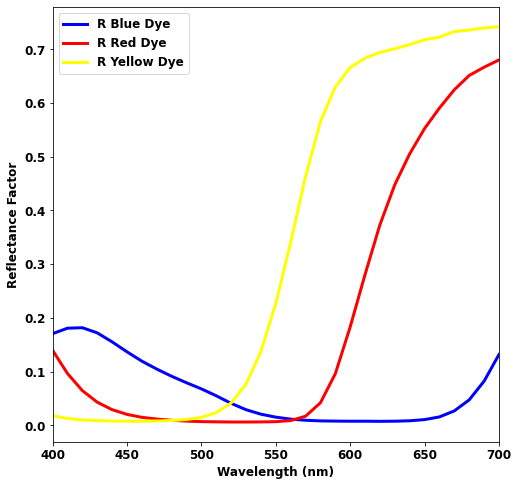

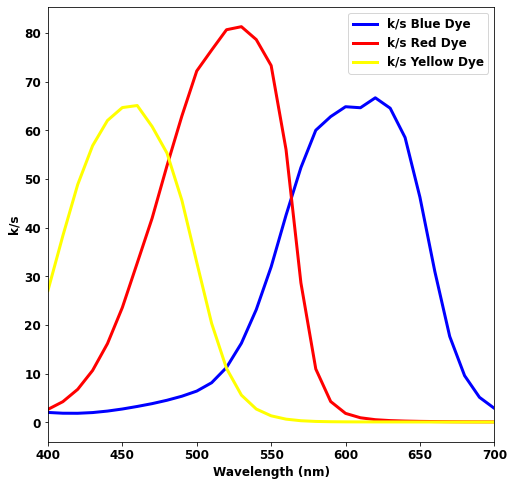

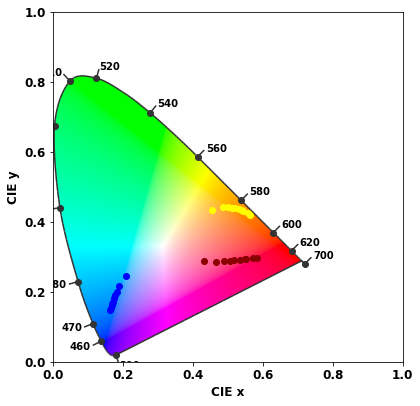

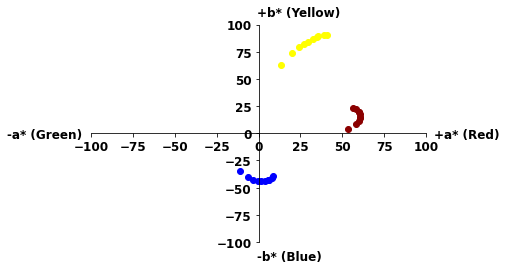

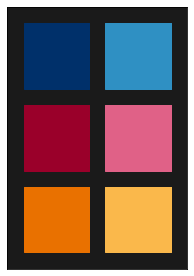

In [6]:
print(
    tabulate(
        {"λ (nm)": wave_length, "R mean": R_mean}, headers="keys", tablefmt="fancy_grid"
    )
)

(p1,) = plt.plot(wave_length, blue_R, color="blue", label="R Blue Dye", linewidth=3)
(p2,) = plt.plot(wave_length, red_R, color="red", label="R Red Dye", linewidth=3)
(p3,) = plt.plot(
    wave_length, yellow_R, color="yellow", label="R Yellow Dye", linewidth=3
)
lines = [p1, p2, p3]
draw_R_style1(lines)

print()

(p1,) = plt.plot(
    wave_length, blue_KOVERS, color="blue", label="k/s Blue Dye", linewidth=3
)
(p2,) = plt.plot(wave_length, red_KOVERS, color="red", label="k/s Red Dye", linewidth=3)
(p3,) = plt.plot(
    wave_length, yellow_KOVERS, color="yellow", label="k/s Yellow Dye", linewidth=3
)
lines = [p1, p2, p3]
draw_KoverS_style1(lines)

print()

Mix = Mixture(R_sub)
# Substrate
Mix.clear()
OBS_sub = Observation(light_source, viewer, Mix.getR(), "Sub")
# D65
OBS_D65 = Observation(light_source, viewer, 1, "D65", "grey")
# Blue 1
Mix.clear()
Mix.add(1, blue_KOVERS)
OBS2 = Observation(light_source, viewer, Mix.getR(), "Blue Dye")
blue_R_show = Mix.getR()
# Red 1
Mix.clear()
Mix.add(1, red_KOVERS)
OBS3 = Observation(light_source, viewer, Mix.getR(), "Red Dye")
red_R_show = Mix.getR()
# Yellow 1
Mix.clear()
Mix.add(1, yellow_KOVERS)
OBS4 = Observation(light_source, viewer, Mix.getR(), "Yellow Dye")
yellow_R_show = Mix.getR()

# Blue 0.05
Mix.clear()
Mix.add(0.05, blue_KOVERS)
OBS5 = Observation(light_source, viewer, Mix.getR(), "Blue Dye")
# Red 0.05
Mix.clear()
Mix.add(0.05, red_KOVERS)
OBS6 = Observation(light_source, viewer, Mix.getR(), "Red Dye")
# Yellow 0.05
Mix.clear()
Mix.add(0.05, yellow_KOVERS)
OBS7 = Observation(light_source, viewer, Mix.getR(), "Yellow Dye")

# Color Range
blue_points = []
red_points = []
yellow_points = []

if interval == "Small":
    color_range = np.linspace(0, 1, 50)
    print(color_range)
else:
    color_range = np.array([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.35, 0.45, 0.5, 0.75, 1])
for i in color_range:
    if i == 0:
        continue
    # Blue
    Mix.clear()
    Mix.add(i, blue_KOVERS)
    OBS_new = Observation(light_source, viewer, Mix.getR(), "", "blue")
    blue_points.append(OBS_new)
    # Red
    Mix.clear()
    Mix.add(i, red_KOVERS)
    OBS_new = Observation(light_source, viewer, Mix.getR(), "", "darkred")
    red_points.append(OBS_new)
    # Yellow
    Mix.clear()
    Mix.add(i, yellow_KOVERS)
    OBS_new = Observation(light_source, viewer, Mix.getR(), "", "yellow")
    yellow_points.append(OBS_new)

color_points = blue_points + red_points + yellow_points

draw_CIE1931(color_points)
draw_CIELab(color_points)

draw_rgb_from_XYZ(OBS2.getXYZ(), "Blue Dye", False)
draw_rgb_from_XYZ(OBS5.getXYZ(), "Blue Dye", False)

draw_rgb_from_XYZ(OBS3.getXYZ(), "Red Dye", False)
draw_rgb_from_XYZ(OBS6.getXYZ(), "Red Dye", False)

draw_rgb_from_XYZ(OBS4.getXYZ(), "Yellow Dye", False)
draw_rgb_from_XYZ(OBS7.getXYZ(), "Yellow Dye", False)

draw_rgb_from_all()
resetSwatch()

# Same R Substrate for New Surface

In [7]:
R_sub = R_sub
# R_sub = np.array([mm.array_repeat(1, data_size)]).T
Mix = Mixture(R_sub)

# Creating Look up Table


3 EigenVectors with Highest EigenValues
[[ 0.09483373 -0.11570643  0.15767145  0.13502343  0.04227553  0.01537553
   0.68705186  0.16506011 -0.52088994  0.21078248  0.04803513 -0.0775283
  -0.1955709  -0.07689112 -0.0691027   0.21392313  0.10883411 -0.02842454
  -0.00742043 -0.00944698 -0.01158433  0.01219628 -0.02104421  0.00348477
   0.01504926  0.00114911 -0.0121234   0.01790183 -0.00452232  0.00973035
   0.01003395]
 [ 0.1353475  -0.17545023  0.22671522  0.17301411  0.11678183 -0.02452445
   0.35124184  0.00246697  0.08137825 -0.13064751  0.01078028  0.14796422
   0.25835749  0.15818254  0.20203634 -0.63119229 -0.32125463  0.10558092
   0.0522483   0.03052858  0.07833556 -0.0358999   0.06553649 -0.01263544
  -0.05519987  0.03308766  0.08367907 -0.09461422  0.02463634 -0.05065704
  -0.0457393 ]
 [ 0.14416032 -0.19511855  0.23874847  0.1654432   0.14683691 -0.03530315
   0.12764635 -0.07413782  0.32175717 -0.2252548   0.02033118  0.16128194
   0.24043937  0.0154536   0.01312359  0.3

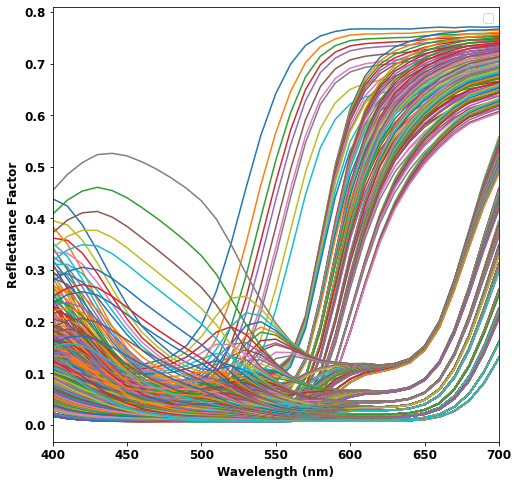

+------+-----------------------+----------------------+----------------------+---------------------+
|  No  |           R           |         PCC          |         XYZ          |  C Blue Red Yellow  |
+------+-----------------------+----------------------+----------------------+---------------------+
|      | [ 0.201  0.166  0.142 |                      |                      |                     |
|      |  0.128  0.121  0.117  |                      |                      |                     |
|      |  0.117  0.124  0.133  |                      |                      |                     |
|      |         0.153         |                      |                      |                     |
|      |   0.193  0.259  0.352 |                      |                      |                     |
|      |  0.459  0.561  0.642  |     [-0.03747928     |    [ 57.81562194     |                     |
|  1   |  0.699  0.735  0.754  |     -0.26172553      |     55.29692836      | [ 0.    0.  

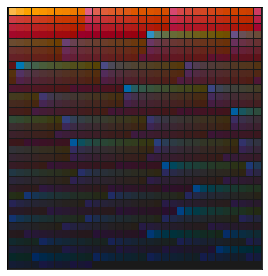

In [8]:
Dis1 = color_range
Dis2 = Dis1
Dis3 = Dis1
pr = len(Dis1)

R_Lookup = []
XYZ_Lookup = []
C_Lookup = []
PCC_Lookup = []

# Start Multiple
# Multiple only R
R_Lookup_blue = []
R_Lookup_red = []
R_Lookup_yellow = []

R_Lookup_blue_red = []
R_Lookup_blue_yellow = []
R_Lookup_red_yellow = []

R_Lookup_blue_red_yellow = []

# Multiple only C
C_Lookup_blue = []
C_Lookup_red = []
C_Lookup_yellow = []

C_Lookup_blue_red = []
C_Lookup_blue_yellow = []
C_Lookup_red_yellow = []

C_Lookup_blue_red_yellow = []

# Multiple only PCC
PCC_Lookup_blue = []
PCC_Lookup_red = []
PCC_Lookup_yellow = []

PCC_Lookup_blue_red = []
PCC_Lookup_blue_yellow = []
PCC_Lookup_red_yellow = []

PCC_Lookup_blue_red_yellow = []

# Multiple only XYZ
XYZ_Lookup_blue = []
XYZ_Lookup_red = []
XYZ_Lookup_yellow = []

XYZ_Lookup_blue_red = []
XYZ_Lookup_blue_yellow = []
XYZ_Lookup_red_yellow = []

XYZ_Lookup_blue_red_yellow = []
# Finish Multiple

# Eigen Vector & Value
if MUNSELL_FOR_EIGEN:
    munsell_A = np.cov(munsell_D)
    eigenValues, eigenVectors = linalg.eig(munsell_A)
    idx = eigenValues.argsort()[::-1]
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:, idx]
else:
    R_Lookup = np.array(R_Lookup)
    lookup_A = np.cov(R_Lookup.T)
    eigenValues, eigenVectors = linalg.eig(lookup_A)
    idx = eigenValues.argsort()[::-1]
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:, idx]

# print(eigenVectors)
print("\n3 EigenVectors with Highest EigenValues")
print(eigenVectors[0:3])
print("\n3 Highest EigenValues")
print(eigenValues[0:3])
print()

for x in range(pr):
    for y in range(pr):
        for z in range(pr):
            if (Dis1[x] + Dis2[y] + Dis3[z]) > 1.5:
                continue
            if (Dis1[x] + Dis2[y] + Dis3[z]) == 0:
                continue
            """
            if (Dis1[x] + Dis2[y]) == 0:
                continue
            if (Dis2[y] + Dis3[z]) == 0:
                continue
            if (Dis1[x] + Dis3[z]) == 0:
                continue
              
            if Dis1[x]==0 or Dis2[y]==0 or Dis3[z]==0:
                continue
            """

            Mix.clear()
            Mix.add(Dis1[x], blue_KOVERS)
            Mix.add(Dis2[y], red_KOVERS)
            Mix.add(Dis3[z], yellow_KOVERS)
            Temp = Observation(light_source, viewer, Mix.getR())
            XYZ_Lookup.append([Temp.getX(), Temp.getY(), Temp.getZ()])
            C_Lookup.append([Dis1[x], Dis2[y], Dis3[z]])
            R_Lookup.append(Mix.getR().T[0])
            PCC_Temp = mm.PC(Mix.getR().T[0], dim, eigenVectors, R_mean)
            PCC_Lookup.append(PCC_Temp)
            # Multiple Add
            if Multi_Interpolation:
                if Dis1[x] != 0 and Dis2[y] == 0 and Dis3[z] == 0:
                    XYZ_Lookup_blue.append([Temp.getX(), Temp.getY(), Temp.getZ()])
                    C_Lookup_blue.append([Dis1[x], Dis2[y], Dis3[z]])
                    R_Lookup_blue.append(Mix.getR().T[0])
                    PCC_Lookup_blue.append(PCC_Temp)
                if Dis1[x] == 0 and Dis2[y] != 0 and Dis3[z] == 0:
                    XYZ_Lookup_red.append([Temp.getX(), Temp.getY(), Temp.getZ()])
                    C_Lookup_red.append([Dis1[x], Dis2[y], Dis3[z]])
                    R_Lookup_red.append(Mix.getR().T[0])
                    PCC_Lookup_red.append(PCC_Temp)
                if Dis1[x] == 0 and Dis2[y] == 0 and Dis3[z] != 0:
                    XYZ_Lookup_yellow.append([Temp.getX(), Temp.getY(), Temp.getZ()])
                    C_Lookup_yellow.append([Dis1[x], Dis2[y], Dis3[z]])
                    R_Lookup_yellow.append(Mix.getR().T[0])
                    PCC_Lookup_yellow.append(PCC_Temp)
                if Dis1[x] != 0 and Dis2[y] != 0 and Dis3[z] == 0:
                    XYZ_Lookup_blue_red.append([Temp.getX(), Temp.getY(), Temp.getZ()])
                    C_Lookup_blue_red.append([Dis1[x], Dis2[y], Dis3[z]])
                    R_Lookup_blue_red.append(Mix.getR().T[0])
                    PCC_Lookup_blue_red.append(PCC_Temp)
                if Dis1[x] != 0 and Dis2[y] == 0 and Dis3[z] != 0:
                    XYZ_Lookup_blue_yellow.append(
                        [Temp.getX(), Temp.getY(), Temp.getZ()]
                    )
                    C_Lookup_blue_yellow.append([Dis1[x], Dis2[y], Dis3[z]])
                    R_Lookup_blue_yellow.append(Mix.getR().T[0])
                    PCC_Lookup_blue_yellow.append(PCC_Temp)
                if Dis1[x] == 0 and Dis2[y] != 0 and Dis3[z] != 0:
                    XYZ_Lookup_red_yellow.append(
                        [Temp.getX(), Temp.getY(), Temp.getZ()]
                    )
                    C_Lookup_red_yellow.append([Dis1[x], Dis2[y], Dis3[z]])
                    R_Lookup_red_yellow.append(Mix.getR().T[0])
                    PCC_Lookup_red_yellow.append(PCC_Temp)
                if Dis1[x] != 0 and Dis2[y] != 0 and Dis3[z] != 0:
                    XYZ_Lookup_blue_red_yellow.append(
                        [Temp.getX(), Temp.getY(), Temp.getZ()]
                    )
                    C_Lookup_blue_red_yellow.append([Dis1[x], Dis2[y], Dis3[z]])
                    R_Lookup_blue_red_yellow.append(Mix.getR().T[0])
                    PCC_Lookup_blue_red_yellow.append(PCC_Temp)

for i in range(len(R_Lookup)):
    (p1,) = plt.plot(wave_length, R_Lookup[i])
    lines = [p1]
    OBS_new = Observation(light_source, viewer, R_Lookup[i], "", "green")
    draw_rgb_from_XYZ(OBS_new.getXYZ(), "", False)

if interval != "Small":
    draw_R_style1(lines)
    draw_rgb_from_all()
resetSwatch()

R_Lookup = np.array(R_Lookup)
XYZ_Lookup = np.array(XYZ_Lookup)
C_Lookup = np.array(C_Lookup)
PCC_Lookup = np.array(PCC_Lookup)

Table = []
Table.append(
    [
        "No",
        "R",
        "PCC",
        "XYZ",
        "C Blue Red Yellow",
    ]
)

for i in range(len(R_Lookup)):
    R_Temp = "..."
    if OUTPUT == 1:
        R_Temp = np.round(R_Lookup[i], 3)

    Table.append(
        [
            i + 1,
            R_Temp,
            PCC_Lookup[i],
            XYZ_Lookup[i],
            C_Lookup[i],
        ]
    )

if interval != "Small":
    output.save(Table, "Lookup_table")
print()
print(len(R_Lookup))
print(Dis1)

# Creating Samples to Evaluate Methods

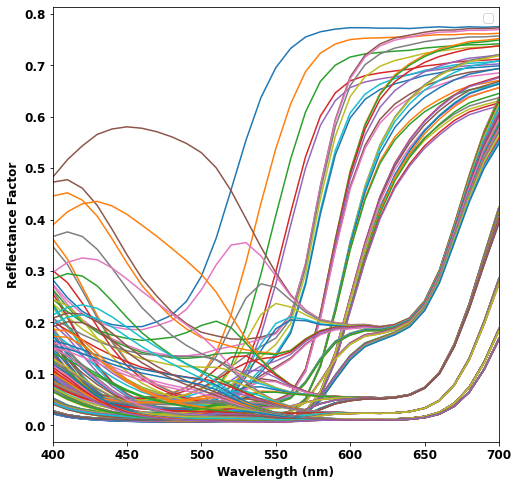

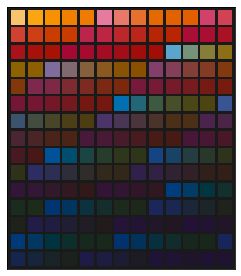

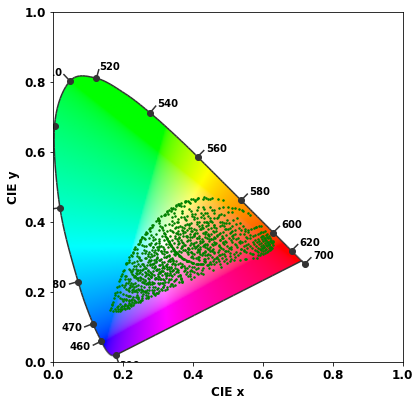

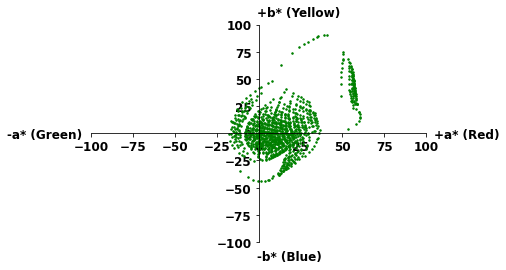

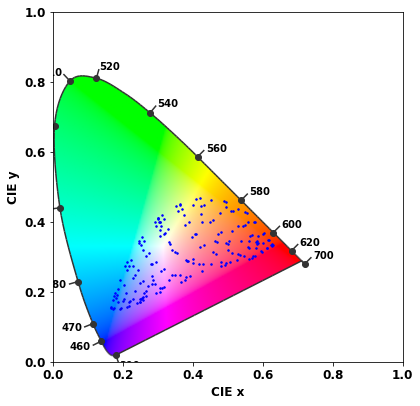

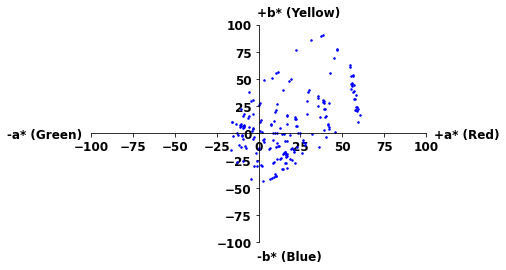

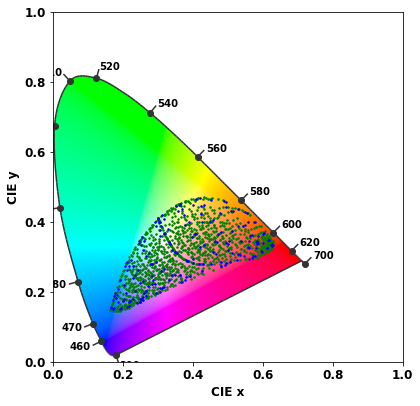

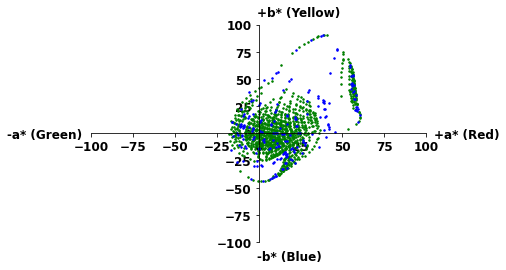

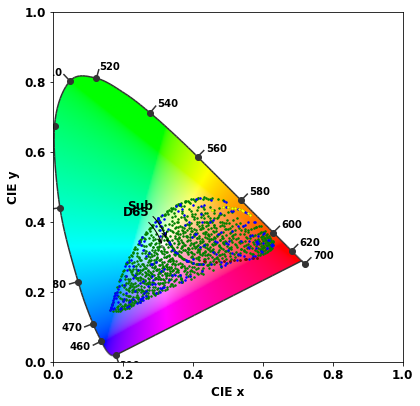

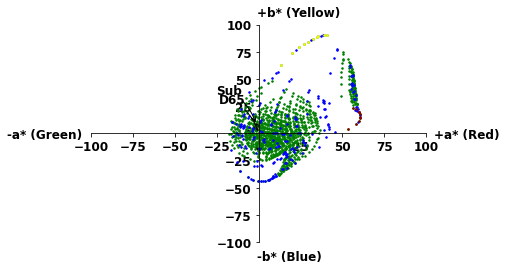

+-----+-----------------------+----------------------+----------------------+----------------------+
| No  |           R           |         PCC          |         XYZ          |  C Blue Red Yellow   |
+-----+-----------------------+----------------------+----------------------+----------------------+
|     | [ 0.284  0.248  0.222 |                      |                      |                      |
|     |  0.205  0.196  0.192  |                      |                      |                      |
|     |  0.192  0.201  0.214  |                      |                      |                      |
|     |         0.241         |                      |                      |                      |
|     |   0.29   0.364  0.458 |                      |                      |                      |
|     |  0.554  0.637  0.695  |    [ 60.74434686     |     [ 0.00593456     |     [ 0.     0.      |
|  1  |  0.733  0.755  0.765  |     60.47855796      |     -0.17191345      |        0.025]

In [9]:
Dis1 = np.array([0, 0.025, 0.125, 0.3, 0.6, 0.7])
Dis2 = Dis1
Dis3 = Dis1
pr = len(Dis1)

R_Samples = []
XYZ_Samples = []
C_Samples = []
PCC_Samples = []

if MUNSELL_AS_SAMPLE:
    for R_T in munsell_R.T:
        Temp = Observation(light_source, viewer, R_T)
        XYZ_Samples.append([Temp.getX(), Temp.getY(), Temp.getZ()])
        C_Samples.append([0, 0, 0])
        R_Samples.append(R_T)
        PCC_Samples.append(mm.PC(R_T, dim, eigenVectors, R_mean))
else:
    for x in range(pr):
        for y in range(pr):
            for z in range(pr):
                if (Dis1[x] + Dis2[y] + Dis3[z]) > 1.5:
                    continue
                if (Dis1[x] + Dis2[y] + Dis3[z]) == 0:
                    continue

                """
                if (Dis1[x] + Dis2[y]) == 0:
                    continue
                if (Dis2[y] + Dis3[z]) == 0:
                    continue
                if (Dis1[x] + Dis3[z]) == 0:
                    continue
                if Dis1[x]==0 or Dis2[y]==0 or Dis3[z]==0:
                    continue
                """

                Mix.clear()
                Mix.add(Dis1[x], blue_KOVERS)
                Mix.add(Dis2[y], red_KOVERS)
                Mix.add(Dis3[z], yellow_KOVERS)
                Temp = Observation(light_source, viewer, Mix.getR())
                XYZ_Samples.append([Temp.getX(), Temp.getY(), Temp.getZ()])
                C_Samples.append([Dis1[x], Dis2[y], Dis3[z]])
                R_Samples.append(Mix.getR().T[0])
                PCC_Samples.append(mm.PC(Mix.getR().T[0], dim, eigenVectors, R_mean))

R_Samples = np.array(R_Samples)
XYZ_Samples = np.array(XYZ_Samples)
C_Samples = np.array(C_Samples)
PCC_Samples = np.array(PCC_Samples)


all_points_sp = []
all_points_sp_look = []
all_points_sp_samples = []

for i in R_Lookup:
    OBS_new = Observation(light_source, viewer, i, "", "green")
    all_points_sp.append(OBS_new)
    all_points_sp_look.append(OBS_new)

for i in range(len(R_Samples)):
    (p1,) = plt.plot(wave_length, R_Samples[i])
    lines = [p1]
    OBS_new = Observation(light_source, viewer, R_Samples[i], "", "blue")
    all_points_sp.append(OBS_new)
    all_points_sp_samples.append(OBS_new)
    draw_rgb_from_XYZ(OBS_new.getXYZ(), "Sample " + str(i), False)

draw_R_style1(lines)

draw_rgb_from_all()
resetSwatch()

all_points_sp = all_points_sp + blue_points + red_points + yellow_points
all_points_sp2 = all_points_sp.copy()
all_points_sp = all_points_sp + [OBS_sub] + [OBS_D65]

if interval != "Small":
    draw_CIE1931(all_points_sp_look, True)
    draw_CIELab(all_points_sp_look, True)

    draw_CIE1931(all_points_sp_samples, True)
    draw_CIELab(all_points_sp_samples, True)

    draw_CIE1931(all_points_sp_look + all_points_sp_samples, True)
    draw_CIELab(all_points_sp_look + all_points_sp_samples, True)

    draw_CIE1931(all_points_sp, True)
    draw_CIELab(all_points_sp, True)

Table = []
Table.append(
    [
        "No",
        "R",
        "PCC",
        "XYZ",
        "C Blue Red Yellow",
    ]
)

for i in range(len(R_Samples)):
    R_Temp = "..."
    if OUTPUT == 1:
        R_Temp = np.round(R_Samples[i], 3)

    Table.append(
        [
            i + 1,
            R_Temp,
            XYZ_Samples[i],
            PCC_Samples[i],
            C_Samples[i],
        ]
    )

output.save(Table, "Samples_table")
total_count = len(R_Samples)
print()
print(Dis1)

# Delaunay Triangulation

In [10]:
start_time = time.time()

if Multi_Interpolation:
    Mix_Lookup_PCC = [
        PCC_Lookup_blue,
        PCC_Lookup_red,
        PCC_Lookup_yellow,
        PCC_Lookup_blue_red,
        PCC_Lookup_blue_yellow,
        PCC_Lookup_red_yellow,
        PCC_Lookup_blue_red_yellow,
        PCC_Lookup
    ]

    Mix_Lookup_XYZ = [
        XYZ_Lookup_blue,
        XYZ_Lookup_red,
        XYZ_Lookup_yellow,
        XYZ_Lookup_blue_red,
        XYZ_Lookup_blue_yellow,
        XYZ_Lookup_red_yellow,
        XYZ_Lookup_blue_red_yellow,
        XYZ_Lookup
    ]

    Mix_Lookup_C = [
        C_Lookup_blue,
        C_Lookup_red,
        C_Lookup_yellow,
        C_Lookup_blue_red,
        C_Lookup_blue_yellow,
        C_Lookup_red_yellow,
        C_Lookup_blue_red_yellow,
        C_Lookup
    ]

    R_calc = BestDelaunay(Mix_Lookup_PCC, Mix_Lookup_C)
    XYZ_calc = BestDelaunay(Mix_Lookup_XYZ, Mix_Lookup_C)
else:
    R_calc = MyDelaunay(PCC_Lookup, C_Lookup)
    XYZ_calc = MyDelaunay(XYZ_Lookup, C_Lookup)

print("Execution takes %s seconds" % (time.time() - start_time))
SP_Compare = SpecialCompare(blue_KOVERS, red_KOVERS, yellow_KOVERS, Mix)

Execution takes 0.05949139595031738 seconds


# Focus Function

In [11]:
# Focus
Name = 1


def focus(R_calcF, Method_PCC_R_orgF, max_no, method="PCA"):
    if dim == 2:
        focus2D(R_calcF, Method_PCC_R_orgF, max_no, method)
        return True
    if dim > 3:
        return True

    global Name
    print("========== Analyze started ==========")
    if method == "PCA":
        C_max = R_calcF.getDetail(PCC_Samples[max_no], C_Lookup)
        XYZ_max = R_calcF.getDetail(PCC_Samples[max_no], XYZ_Lookup)
        R_max = R_calcF.getDetail(PCC_Samples[max_no], R_Lookup)
    else:
        C_max = R_calcF.getDetail(XYZ_Samples[max_no], C_Lookup)
        XYZ_max = R_calcF.getDetail(XYZ_Samples[max_no], XYZ_Lookup)
        R_max = R_calcF.getDetail(XYZ_Samples[max_no], R_Lookup)

    plt.clf()
    (p1,) = plt.plot(
        wave_length,
        R_max[0],
        color="purple",
        label="R Lookup 1",
        linewidth=3,
        linestyle="dotted",
    )
    (p2,) = plt.plot(
        wave_length,
        R_max[1],
        color="cyan",
        label="R Lookup 2",
        linewidth=3,
        linestyle="dotted",
    )
    (p3,) = plt.plot(
        wave_length,
        R_max[2],
        color="brown",
        label="R Lookup 3",
        linewidth=3,
        linestyle="dotted",
    )
    (p4,) = plt.plot(
        wave_length,
        R_max[3],
        color="green",
        label="R Lookup 4",
        linewidth=3,
        linestyle="dotted",
    )
    (p5,) = plt.plot(
        wave_length, R_Samples[max_no], color="black", label="R Sample", linewidth=3
    )
    (p6,) = plt.plot(
        wave_length,
        Method_PCC_R_orgF[max_no],
        color="red",
        label="R Interpolated",
        linewidth=3,
        linestyle="dashed",
    )
    lines = [p1, p2, p3, p4, p5, p6]
    draw_R_style1(lines)

    # Near Start
    k_no = max_no
    if method == "PCA":
        a = R_calcF.tri.plane_distance(PCC_Samples[k_no])
    else:
        a = R_calcF.tri.plane_distance(XYZ_Samples[k_no])
    all = {}
    index = 0
    for i in a:
        all[index] = i
        index += 1
    all = dict(sorted(all.items(), key=lambda x: x[1], reverse=False))
    ss = list(all.keys())[0]
    print(ss)
    print(":")
    ff = list(all.values())[0]
    print(ff)
    dx = R_calc.tri.simplices[ss]
    print(R_Lookup[dx])
    print(a.shape)

    (p1,) = plt.plot(
        wave_length,
        R_Lookup[dx][0],
        color="purple",
        label="R Lookup 1",
        linewidth=3,
        linestyle="dotted",
    )
    (p2,) = plt.plot(
        wave_length,
        R_Lookup[dx][1],
        color="cyan",
        label="R Lookup 2",
        linewidth=3,
        linestyle="dotted",
    )
    (p3,) = plt.plot(
        wave_length,
        R_Lookup[dx][2],
        color="brown",
        label="R Lookup 3",
        linewidth=3,
        linestyle="dotted",
    )
    (p4,) = plt.plot(
        wave_length,
        R_Lookup[dx][3],
        color="green",
        label="R Lookup 4",
        linewidth=3,
        linestyle="dotted",
    )
    (p5,) = plt.plot(
        wave_length, R_Samples[k_no], color="black", label="R Sample", linewidth=3
    )
    lines = [p1, p2, p3, p4, p5]
    draw_R_style1(lines)
    # Near End

    # R Lookup 1
    OBS1 = Observation(light_source, viewer, R_max[0], "", "black")
    # R Lookup 2
    OBS2 = Observation(light_source, viewer, R_max[1], "", "black")
    # R Lookup 3
    OBS3 = Observation(light_source, viewer, R_max[2], "", "black")
    # R Lookup 4
    OBS4 = Observation(light_source, viewer, R_max[3], "", "black")
    # R Sample
    OBS5 = Observation(light_source, viewer, R_Samples[max_no], "", "green")
    # R Interpolated
    OBS6 = Observation(light_source, viewer, Method_PCC_R_orgF[max_no], "", "red")

    color_points = [OBS1, OBS2, OBS3, OBS4, OBS5, OBS6]
    draw_CIE1931(color_points)
    draw_CIELab(color_points)

    if method == "PCA":
        res = R_calcF.getResult(PCC_Samples[max_no], C_Lookup)
        var = R_calcF.getVariables(PCC_Samples[max_no])
        # Plot PCC 3D
        from mpl_toolkits.mplot3d import Axes3D

        fig = plt.figure()
        ax = fig.add_subplot(111, projection="3d")

        # Draw Delauny
        """
        points = R_calcF.tri.points
        for tr in R_calcF.tri.simplices:
            pts = points[tr, :]
            ax.plot3D(
                pts[[0, 1], 0], pts[[0, 1], 1], pts[[0, 1], 2], color="g", lw="0.1"
            )
            ax.plot3D(
                pts[[0, 2], 0], pts[[0, 2], 1], pts[[0, 2], 2], color="g", lw="0.1"
            )
            ax.plot3D(
                pts[[0, 3], 0], pts[[0, 3], 1], pts[[0, 3], 2], color="g", lw="0.1"
            )
            ax.plot3D(
                pts[[1, 2], 0], pts[[1, 2], 1], pts[[1, 2], 2], color="g", lw="0.1"
            )
            ax.plot3D(
                pts[[1, 3], 0], pts[[1, 3], 1], pts[[1, 3], 2], color="g", lw="0.1"
            )
            ax.
                pts[[2, 3], 0], pts[[2, 3], 1], pts[[2, 3], 2], color="g", lw="0.1"
            )

        ax.scatter(points[:, 0], points[:, 1], points[:, 2], color="b")
        """
        # End Draw

        for i in range(4):
            PCC = mm.PC(R_max[i], dim, eigenVectors, R_mean)
            ax.scatter(PCC[0], PCC[1], PCC[2], c="cyan", marker="s")
        PCC = mm.PC(R_Samples[max_no], dim, eigenVectors, R_mean)
        ax.scatter(PCC[0], PCC[1], PCC[2], c="black", marker="v")
        print("Target PCC:", PCC)
        PCC = mm.PC(Method_PCC_R_orgF[max_no], dim, eigenVectors, R_mean)
        ax.scatter(PCC[0], PCC[1], PCC[2], c="red", marker="v")
        print("Final PCC:", PCC)

        ax.set_xlabel("PCC1")
        ax.set_ylabel("PCC2")
        ax.set_zlabel("PCC3")

        plot_save(plt)
        plt.show()
        # End of Plot
    else:
        res = R_calcF.getResult(XYZ_Samples[max_no], C_Lookup)
        var = R_calcF.getVariables(XYZ_Samples[max_no])
        # Plot XYZ 3D
        from mpl_toolkits.mplot3d import Axes3D

        fig = plt.figure()
        ax = fig.add_subplot(111, projection="3d")

        for i in range(4):
            OBS = Observation(light_source, viewer, R_max[i])
            ax.scatter(OBS.getX(), OBS.getY(), OBS.getZ(), c="purple", marker=".")
        OBS = Observation(light_source, viewer, R_Samples[max_no])
        ax.scatter(OBS.getX(), OBS.getY(), OBS.getZ(), c="green", marker="v")
        print("Target XYZ:", OBS.getX(), OBS.getY(), OBS.getZ())
        OBS = Observation(light_source, viewer, Method_PCC_R_orgF[max_no])
        ax.scatter(OBS.getX(), OBS.getY(), OBS.getZ(), c="red", marker="v")
        print("Final XYZ:", OBS.getX(), OBS.getY(), OBS.getZ())

        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")

        plot_save(plt)
        plt.show()
        # End of Plot

    print("C interpolated:", res)
    print("C orginal:", C_Samples[max_no])
    print()
    print("C1", C_max[0])
    print("C2", C_max[1])
    print("C3", C_max[2])
    print("C4", C_max[3])
    print()
    print("Factors:\n", var)
    print("========== Analyze ended ==========")


def focus2D(R_calcF, Method_PCC_R_orgF, max_no, method="PCA"):
    global Name
    print("========== Analyze started ==========")
    if method == "PCA":
        C_max = R_calcF.getDetail(PCC_Samples[max_no], C_Lookup)
        XYZ_max = R_calcF.getDetail(PCC_Samples[max_no], XYZ_Lookup)
        R_max = R_calcF.getDetail(PCC_Samples[max_no], R_Lookup)
    else:
        C_max = R_calcF.getDetail(XYZ_Samples[max_no], C_Lookup)
        XYZ_max = R_calcF.getDetail(XYZ_Samples[max_no], XYZ_Lookup)
        R_max = R_calcF.getDetail(XYZ_Samples[max_no], R_Lookup)

    plt.clf()
    (p1,) = plt.plot(
        wave_length,
        R_max[0],
        color="purple",
        label="R Lookup 1",
        linewidth=3,
        linestyle="dotted",
    )
    (p2,) = plt.plot(
        wave_length,
        R_max[1],
        color="cyan",
        label="R Lookup 2",
        linewidth=3,
        linestyle="dotted",
    )
    (p3,) = plt.plot(
        wave_length,
        R_max[2],
        color="brown",
        label="R Lookup 3",
        linewidth=3,
        linestyle="dotted",
    )
    (p5,) = plt.plot(
        wave_length, R_Samples[max_no], color="black", label="R Sample", linewidth=3
    )
    (p6,) = plt.plot(
        wave_length,
        Method_PCC_R_orgF[max_no],
        color="red",
        label="R Interpolated",
        linewidth=3,
        linestyle="dashed",
    )
    lines = [p1, p2, p3, p5, p6]
    draw_R_style1(lines)

    # R Lookup 1
    OBS1 = Observation(light_source, viewer, R_max[0], "", "black")
    # R Lookup 2
    OBS2 = Observation(light_source, viewer, R_max[1], "", "black")
    # R Lookup 3
    OBS3 = Observation(light_source, viewer, R_max[2], "", "black")
    # R Sample
    OBS5 = Observation(light_source, viewer, R_Samples[max_no], "", "green")
    # R Interpolated
    OBS6 = Observation(light_source, viewer, Method_PCC_R_orgF[max_no], "", "red")

    color_points = [OBS1, OBS2, OBS3, OBS5, OBS6]
    draw_CIE1931(color_points)
    draw_CIELab(color_points)

    if method == "PCA":
        res = R_calcF.getResult(PCC_Samples[max_no], C_Lookup)
        var = R_calcF.getVariables(PCC_Samples[max_no])
        # Plot PCC 3D
        from mpl_toolkits.mplot3d import Axes3D

        _ = delaunay_plot_2d(R_calcF.tri)

        for i in range(3):
            PCC = mm.PC(R_max[i], dim, eigenVectors, R_mean)
            plt.plot(
                PCC[0],
                PCC[1],
                marker="v",
                color="yellow",
            )
        PCC = mm.PC(R_Samples[max_no], dim, eigenVectors, R_mean)
        plt.plot(
            PCC[0],
            PCC[1],
            marker="v",
            color="green",
        )
        print("Target PCC:", PCC)
        PCC = mm.PC(Method_PCC_R_orgF[max_no], dim, eigenVectors, R_mean)
        plt.plot(
            PCC[0],
            PCC[1],
            marker="v",
            color="red",
        )
        print("Final PCC:", PCC)
        plot_save(plt)
        plt.show()
        # End of Plot
    print("========== Analyze ended ==========")

# Method 1 Interpolation using R with reduced dimension Based on PCA (3D) => Project purpose

Min ΔE


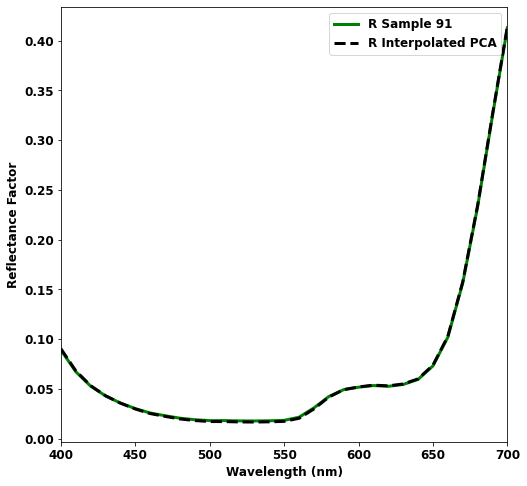

Max ΔE


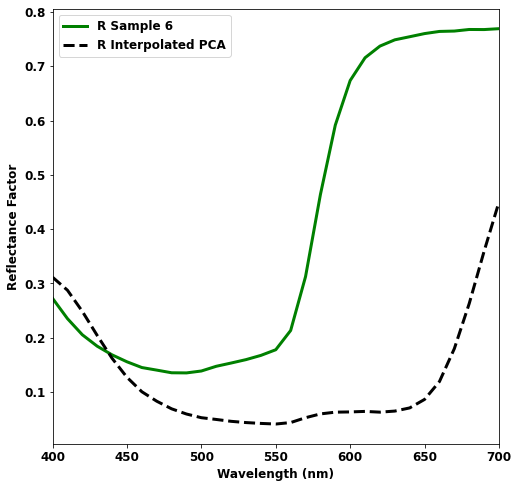

Min RMS


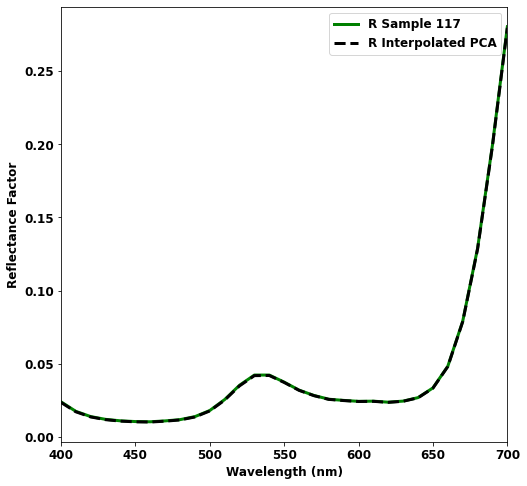

Max RMS


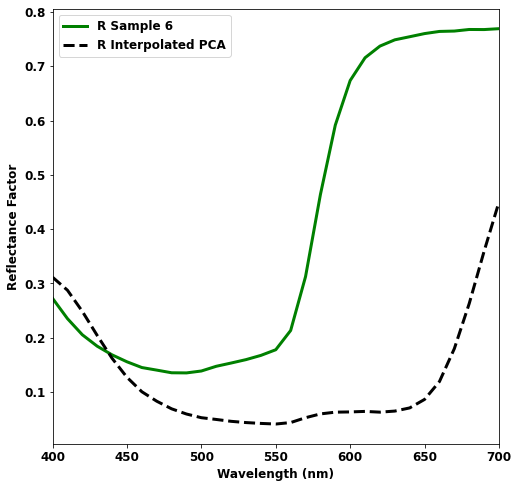

Max GFC


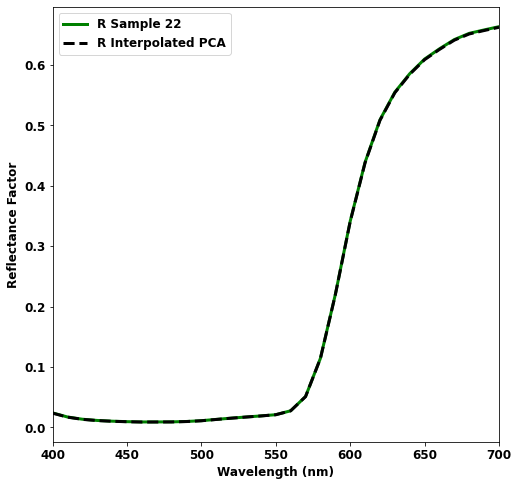

Min GFC


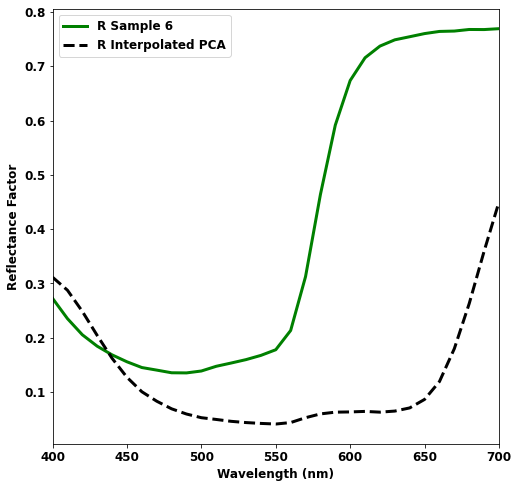

Min ΔC


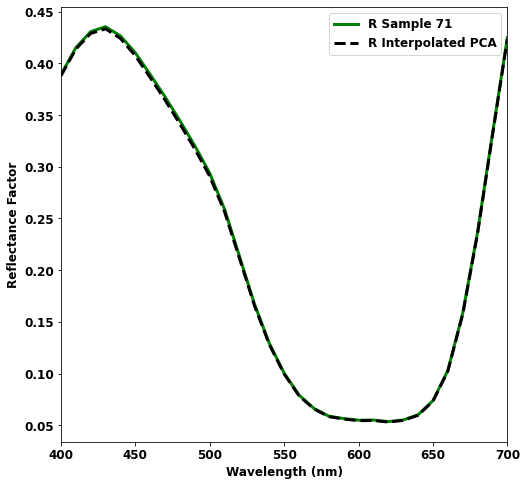

Max ΔC


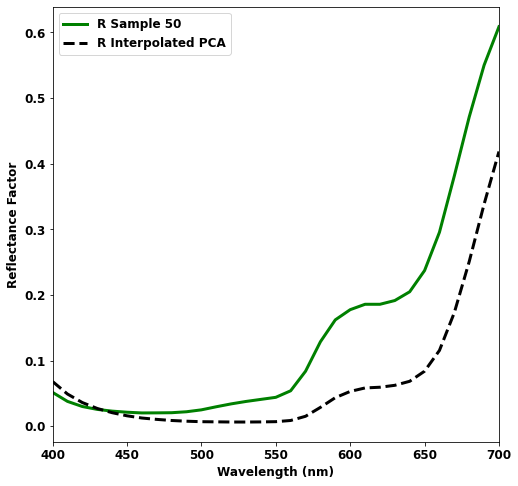

Random Sample


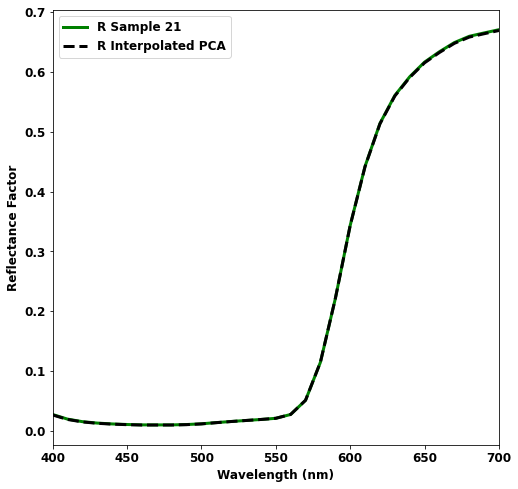

Random Sample


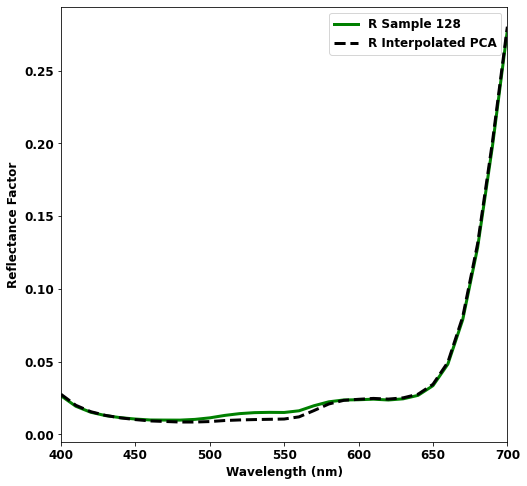

Random Sample


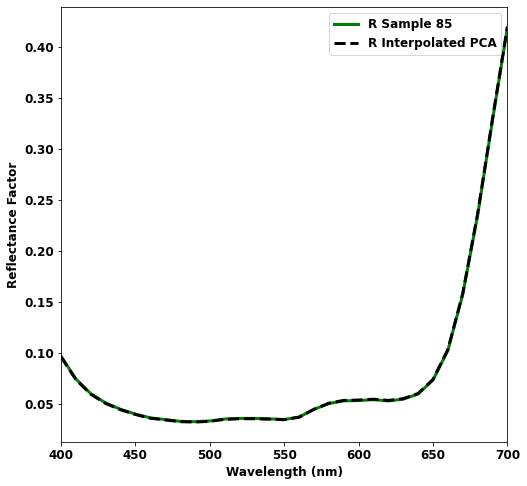

Random Sample


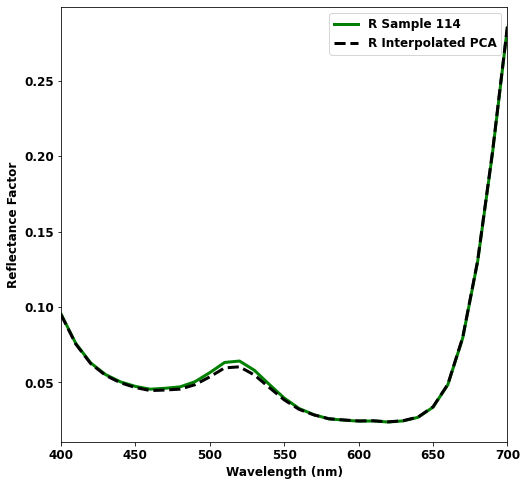

Random Sample


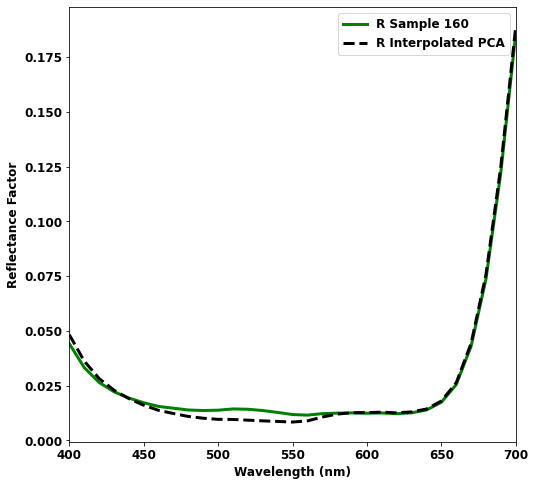

Random Sample


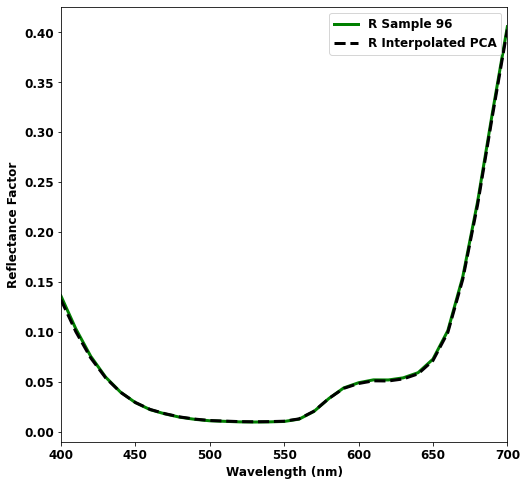

Random Sample


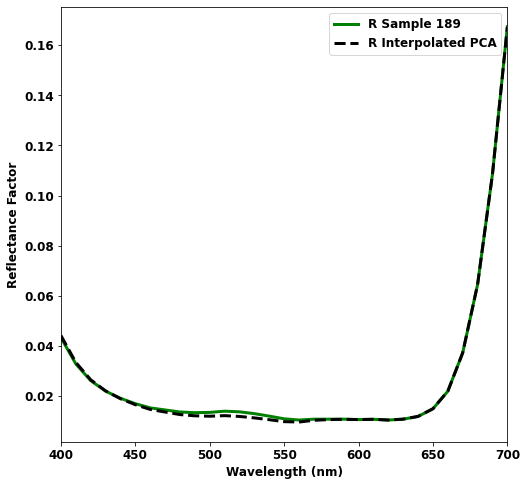

Random Sample


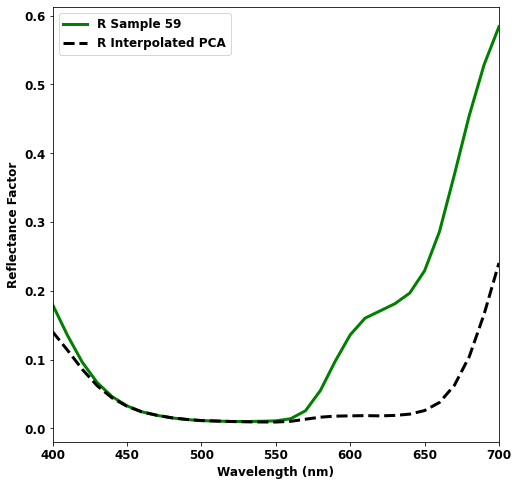


mean RMS:  0.129656160457
mean ΔE:  7.7595406691
mean ΔC:  0.11235776821
mean GFC:  0.986888405461
Min RMS:  0.00172649703224
Max RMS:  2.13648970156
Min ΔE:  0.0182503964863
Max ΔE:  86.3842262426
Min ΔC:  0.00107679061798
Max ΔC:  0.825595196936
Min GFC:  0.727393702173
Max GFC:  0.99999994276
167


In [12]:
count1 = 0

# Initial Value
M_R_RMS, M_R_DeltaE, M_R_DeltaC, M_R_GFC = 0, 0, 0, 0

M_R_minRMS, M_R_maxRMS = 0, 0
M_R_minRMS_no, M_R_maxRMS_no = -1, -1

M_R_minE, M_R_maxE = 0, 0
M_R_minE_no, M_R_maxE_no = -1, -1

M_R_minC, M_R_maxC = 0, 0
M_R_minC_no, M_R_maxC_no = -1, -1

M_R_minGFC, M_R_maxGFC = 0, 0
M_R_minGFC_no, M_R_maxGFC_no = -1, -1

Method_PCC_R = {}
Method_PCC_RMS = {}
Method_PCC_RMS_RMS = {}
Method_PCC_RMS_GFC = {}
Method_PCC_RMS_C = {}
R_out = []
R_bad = []
for i in range(len(R_Samples)):
    R_std = R_Samples[i]
    R_Find = PCC_Samples[i]
    SP_Compare.setR1(R_std)

    try:
        res = R_calc.getInterpolation(R_Find, SP_Compare)
    except Exception:
        R_out.append(i)
        continue
    if MUTUAL_SAMPLES:
        try:
            XYZ_calc.getInterpolation(XYZ_Samples[i], SP_Compare)
        except Exception:
            continue

    count1 += 1
    C_Inter = res[0]

    Mix.clear()
    Mix.add(C_Inter[0], blue_KOVERS)
    Mix.add(C_Inter[1], red_KOVERS)
    Mix.add(C_Inter[2], yellow_KOVERS)
    R_Inter = Mix.getR()
    Method_PCC_R[i] = R_Inter

    Inter = Observation(light_source, viewer, R_Inter)
    STD = Observation(light_source, viewer, R_std)

    compare = Compare(STD, Inter)
    RMS_Inter = compare.RMS()
    DeltaE_Inter = compare.delta_E()
    GFC_Inter = compare.GFC()
    DeltaC_Inter = mm.RMS(C_Samples[i], C_Inter)
    if MUNSELL_AS_SAMPLE:
        DeltaC_Inter = 0

    Method_PCC_RMS[i] = DeltaE_Inter
    Method_PCC_RMS_RMS[i] = RMS_Inter
    Method_PCC_RMS_GFC[i] = GFC_Inter
    Method_PCC_RMS_C[i] = DeltaC_Inter
    
    # Filter
    if DeltaE_Inter > 10:
        R_bad.append(i)
        # count1 -= 1
        # continue

    text_R = "R: " + str(R_std)
    text_RMS = "RMS: " + str(RMS_Inter)
    text_DeltaE = "ΔE: " + str(DeltaE_Inter)
    text_GFC = "GFC: " + str(GFC_Inter)
    text_C_Real = "Real C: " + str(C_Samples[i])
    text_C_Cal = "Interpolated C: " + str(C_Inter)

    text_all = (
        text_RMS
        + "\n"
        + text_DeltaE
        + "\n"
        + text_GFC
        + "\n"
        + text_C_Real
        + "\n"
        + text_C_Cal
        + "\n\n"
        + text_R
    )

    # Sum
    M_R_RMS = M_R_RMS + RMS_Inter
    M_R_DeltaE = M_R_DeltaE + DeltaE_Inter
    M_R_DeltaC = M_R_DeltaC + DeltaC_Inter
    M_R_GFC = M_R_GFC + GFC_Inter

    if count1 == 1:
        M_R_minRMS, M_R_maxRMS = RMS_Inter, RMS_Inter

        M_R_minC, M_R_maxC = DeltaC_Inter, DeltaC_Inter

        M_R_minGFC, M_R_maxGFC = GFC_Inter, GFC_Inter

        M_R_minE, M_R_maxE = DeltaE_Inter, DeltaE_Inter

        (
            M_R_minRMS_no,
            M_R_maxRMS_no,
            M_R_minE_no,
            M_R_maxE_no,
            M_R_minGFC_no,
            M_R_maxGFC_no,
            M_R_minC_no,
            M_R_maxC_no,
        ) = (i, i, i, i, i, i, i, i)

    if RMS_Inter < M_R_minRMS:
        M_R_minRMS = RMS_Inter
        M_R_minRMS_no = i

    if RMS_Inter > M_R_maxRMS:
        M_R_maxRMS = RMS_Inter
        M_R_maxRMS_no = i

    if DeltaE_Inter < M_R_minE:
        M_R_minE = DeltaE_Inter
        M_R_minE_no = i

    if DeltaE_Inter > M_R_maxE:
        M_R_maxE = DeltaE_Inter
        M_R_maxE_no = i

    if DeltaC_Inter < M_R_minC:
        M_R_minC = DeltaC_Inter
        M_R_minC_no = i

    if DeltaC_Inter > M_R_maxC:
        M_R_maxC = DeltaC_Inter
        M_R_maxC_no = i

    if GFC_Inter < M_R_minGFC:
        M_R_minGFC = GFC_Inter
        M_R_minGFC_no = i

    if GFC_Inter > M_R_maxGFC:
        M_R_maxGFC = GFC_Inter
        M_R_maxGFC_no = i

    if PLOT_ALL_SAMPLES:
        (p1,) = plt.plot(
            wave_length, R_std, color="green", label="R Sample " + str(i + 1)
        )
        (p2,) = plt.plot(
            wave_length, R_Inter, color="black", label="R Interpolated (PCA)"
        )
        lines = [p1, p2]
        draw_R_style1(lines, comment=text_all)

if count1 != 0:
    # Result - Plot
    array = [
        M_R_minE_no,
        M_R_maxE_no,
        M_R_minRMS_no,
        M_R_maxRMS_no,
        M_R_maxGFC_no,
        M_R_minGFC_no,
        M_R_minC_no,
        M_R_maxC_no,
    ]
    Method_PCC_R_org = Method_PCC_R.copy()
    # draw_R_subplot_style1(R_Samples, Method_PCC_R, array, "PCA", "normal")

    # Result
    M_R_RMS = M_R_RMS / count1
    M_R_DeltaE = M_R_DeltaE / count1
    M_R_DeltaC = M_R_DeltaC / count1
    M_R_GFC = M_R_GFC / count1

    if ANALYZE_MODE:
        # Details of Max ΔE Samples
        print("\n\n<<<<<<<<<<< Worst Samples >>>>>>>>>>>\n\n")
        d = dict(sorted(Method_PCC_RMS.items(), key=lambda x: x[1], reverse=True))
        index = 0
        for key in d:
            print("Sample", index + 1, ":ΔE =", d[key])
            focus(R_calc, Method_PCC_R_org, key, "PCA")
            index += 1
            if index == 5:
                break

        # Details of Min ΔE Samples
        print("\n\n<<<<<<<<<<< Best Samples >>>>>>>>>>>\n\n")
        d = dict(sorted(Method_PCC_RMS.items(), key=lambda x: x[1]))
        index = 0
        for key in d:
            print("Sample", index + 1, ":ΔE =", d[key])
            focus(R_calc, Method_PCC_R_org, key, "PCA")
            index += 1
            if index == 5:
                break

print()
print("mean RMS: ", M_R_RMS)
print("mean ΔE: ", M_R_DeltaE)
print("mean ΔC: ", M_R_DeltaC)
print("mean GFC: ", M_R_GFC)
print("Min RMS: ", M_R_minRMS)
print("Max RMS: ", M_R_maxRMS)
print("Min ΔE: ", M_R_minE)
print("Max ΔE: ", M_R_maxE)
print("Min ΔC: ", M_R_minC)
print("Max ΔC: ", M_R_maxC)
print("Min GFC: ", M_R_minGFC)
print("Max GFC: ", M_R_maxGFC)
print(count1)

# Method 2 Interpolation using XYZ => For Comparison

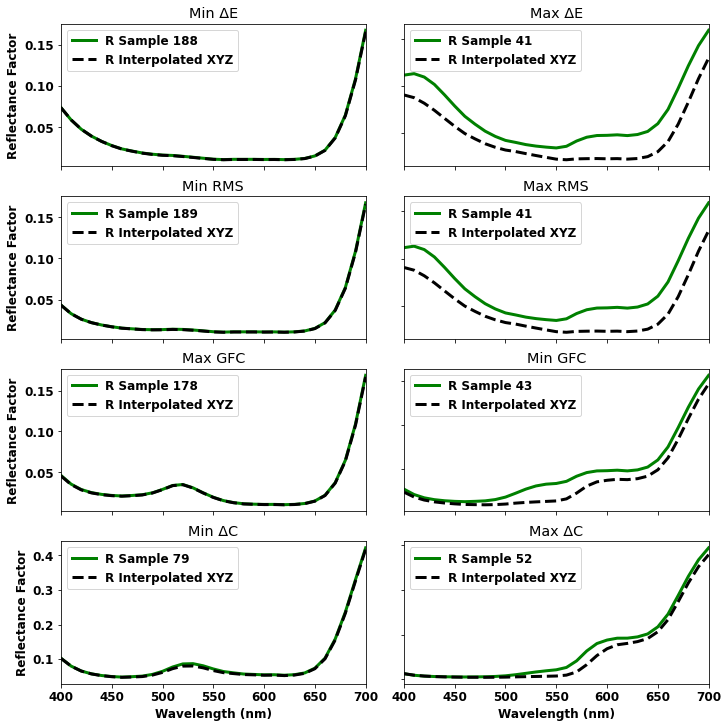

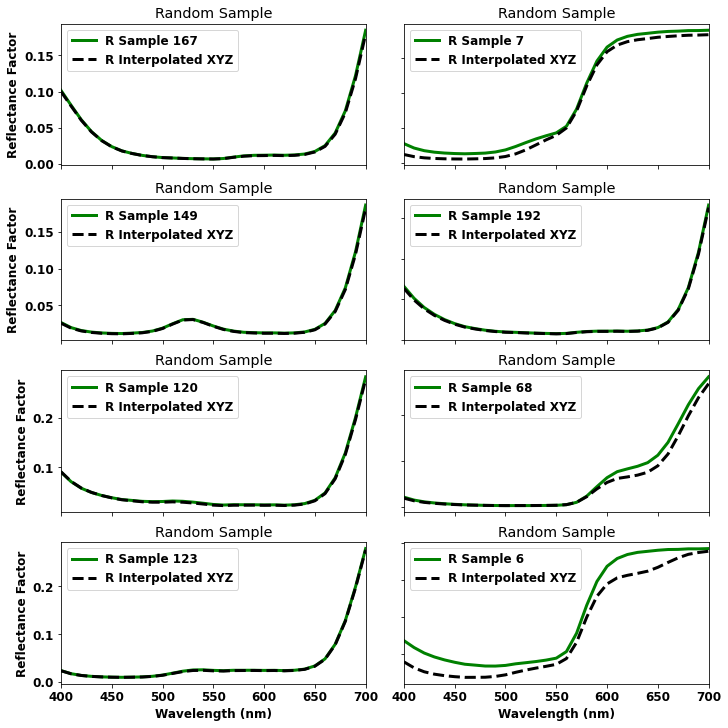


mean RMS:  0.0538831090525
mean ΔE:  3.48320033724
mean ΔC:  0.0502901326268
mean GFC:  0.999083704339
Min RMS:  0.00266040603846
Max RMS:  0.521660253984
Min ΔE:  0.367523329375
Max ΔE:  28.3284889301
Min ΔC:  0.00610895842398
Max ΔC:  0.323867620351
Min GFC:  0.988616118792
Max GFC:  0.999997808264


In [13]:
count2 = 0

# Initial Value
M_XYZ_RMS, M_XYZ_DeltaE, M_XYZ_DeltaC, M_XYZ_GFC = 0, 0, 0, 0

M_XYZ_minRMS, M_XYZ_maxRMS = 0, 0
M_XYZ_minRMS_no, M_XYZ_maxRMS_no = -1, -1

M_XYZ_minE, M_XYZ_maxE = 0, 0
M_XYZ_minE_no, M_XYZ_maxE_no = -1, -1

M_XYZ_minC, M_XYZ_maxC = 0, 0
M_XYZ_minC_no, M_XYZ_maxC_no = -1, -1

M_XYZ_minGFC, M_XYZ_maxGFC = 0, 0
M_XYZ_minGFC_no, M_XYZ_maxGFC_no = -1, -1

Method_XYZ_R = {}
Method_XYZ_RMS = {}
Method_XYZ_RMS_RMS = {}
Method_XYZ_RMS_GFC = {}
Method_XYZ_RMS_C = {}
XYZ_out = []
XYZ_bad = []
for i in range(len(R_Samples)):
    # print(R_Samples[i])
    R_std = R_Samples[i]
    Find = XYZ_Samples[i]
    Temp = Observation(light_source, viewer, R_std)
    SP_Compare.setR1(R_std)

    try:
        res = XYZ_calc.getInterpolation(Find, SP_Compare)
    except Exception:
        XYZ_out.append(i)
        continue
    if MUTUAL_SAMPLES:
        try:
            R_calc.getInterpolation(PCC_Samples[i], SP_Compare)
        except Exception:
            continue

    count2 += 1
    C_Inter = res[0]

    Mix.clear()
    Mix.add(C_Inter[0], blue_KOVERS)
    Mix.add(C_Inter[1], red_KOVERS)
    Mix.add(C_Inter[2], yellow_KOVERS)
    R_Inter = Mix.getR()
    Method_XYZ_R[i] = R_Inter

    Inter = Observation(light_source, viewer, R_Inter)
    STD = Observation(light_source, viewer, R_std)
    compare = Compare(Inter, STD)
    RMS_Inter = compare.RMS()
    DeltaE_Inter = compare.delta_E()
    GFC_Inter = compare.GFC()
    DeltaC_Inter = mm.RMS(C_Samples[i], C_Inter)
    if MUNSELL_AS_SAMPLE:
        DeltaC_Inter = 0

    Method_XYZ_RMS[i] = DeltaE_Inter
    Method_XYZ_RMS_RMS[i] = RMS_Inter
    Method_XYZ_RMS_GFC[i] = GFC_Inter
    Method_XYZ_RMS_C[i] = DeltaC_Inter

    # Filter
    if DeltaE_Inter > 10:
        XYZ_bad.append(i)
        # count2 -= 1
        # continue

    text_R = "R: " + str(R_std)
    text_RMS = "RMS: " + str(RMS_Inter)
    text_DeltaE = "ΔE: " + str(DeltaE_Inter)
    text_GFC = "GFC: " + str(GFC_Inter)
    text_C_Real = "Real C: " + str(C_Samples[i])
    text_C_Cal = "Interpolated C: " + str(C_Inter)

    text_all = (
        text_RMS
        + "\n"
        + text_DeltaE
        + "\n"
        + text_GFC
        + "\n"
        + text_C_Real
        + "\n"
        + text_C_Cal
        + "\n\n"
        + text_R
    )

    # Sum
    M_XYZ_RMS = M_XYZ_RMS + RMS_Inter
    M_XYZ_DeltaE = M_XYZ_DeltaE + DeltaE_Inter
    M_XYZ_DeltaC = M_XYZ_DeltaC + DeltaC_Inter
    M_XYZ_GFC = M_XYZ_GFC + GFC_Inter

    if count2 == 1:
        M_XYZ_minRMS, M_XYZ_maxRMS = RMS_Inter, RMS_Inter

        M_XYZ_minE, M_XYZ_maxE = DeltaE_Inter, DeltaE_Inter

        M_XYZ_minC, M_XYZ_maxC = DeltaC_Inter, DeltaC_Inter

        M_XYZ_minGFC, M_XYZ_maxGFC = GFC_Inter, GFC_Inter

        (
            M_XYZ_minRMS_no,
            M_XYZ_maxRMS_no,
            M_XYZ_minE_no,
            M_XYZ_maxE_no,
            M_XYZ_minGFC_no,
            M_XYZ_maxGFC_no,
            M_XYZ_minC_no,
            M_XYZ_maxC_no,
        ) = (i, i, i, i, i, i, i, i)

    if RMS_Inter < M_XYZ_minRMS:
        M_XYZ_minRMS = RMS_Inter
        M_XYZ_minRMS_no = i

    if RMS_Inter > M_XYZ_maxRMS:
        M_XYZ_maxRMS = RMS_Inter
        M_XYZ_maxRMS_no = i

    if DeltaE_Inter < M_XYZ_minE:
        M_XYZ_minE = DeltaE_Inter
        M_XYZ_minE_no = i

    if DeltaE_Inter > M_XYZ_maxE:
        M_XYZ_maxE = DeltaE_Inter
        M_XYZ_maxE_no = i

    if DeltaC_Inter < M_XYZ_minC:
        M_XYZ_minC = DeltaC_Inter
        M_XYZ_minC_no = i

    if DeltaC_Inter > M_XYZ_maxC:
        M_XYZ_maxC = DeltaC_Inter
        M_XYZ_maxC_no = i

    if GFC_Inter < M_XYZ_minGFC:
        M_XYZ_minGFC = GFC_Inter
        M_XYZ_minGFC_no = i

    if GFC_Inter > M_XYZ_maxGFC:
        M_XYZ_maxGFC = GFC_Inter
        M_XYZ_maxGFC_no = i

    if PLOT_ALL_SAMPLES:
        (p1,) = plt.plot(
            wave_length, R_std, color="green", label="R Sample " + str(i + 1)
        )
        (p2,) = plt.plot(
            wave_length, R_Inter, color="black", label="R Interpolated (XYZ)"
        )
        lines = [p1, p2]
        draw_R_style1(lines, comment=text_all)

if count2 != 0:
    # Result - Plot
    array = [
        M_XYZ_minE_no,
        M_XYZ_maxE_no,
        M_XYZ_minRMS_no,
        M_XYZ_maxRMS_no,
        M_XYZ_maxGFC_no,
        M_XYZ_minGFC_no,
        M_XYZ_minC_no,
        M_XYZ_maxC_no,
    ]
    Method_XYZ_R_org = Method_XYZ_R.copy()
    # draw_R_subplot_style1(R_Samples, Method_XYZ_R, array, "XYZ", "sub")

    # Result
    M_XYZ_RMS = M_XYZ_RMS / count2
    M_XYZ_DeltaE = M_XYZ_DeltaE / count2
    M_XYZ_DeltaC = M_XYZ_DeltaC / count2
    M_XYZ_GFC = M_XYZ_GFC / count2

    if ANALYZE_MODE:
        # Details of Max ΔE Samples
        print("\n\n<<<<<<<<<<< Worst Samples >>>>>>>>>>>\n\n")
        d = dict(sorted(Method_XYZ_RMS.items(), key=lambda x: x[1], reverse=True))
        index = 0
        for key in d:
            print("Sample", index + 1, ":ΔE =", d[key])
            focus(XYZ_calc, Method_XYZ_R_org, key, "XYZ")
            index += 1
            if index == 5:
                break

        # Details of Min ΔE Samples
        print("\n\n<<<<<<<<<<< Best Samples >>>>>>>>>>>\n\n")
        d = dict(sorted(Method_XYZ_RMS.items(), key=lambda x: x[1]))
        index = 0
        for key in d:
            print("Sample", index + 1, ":ΔE =", d[key])
            focus(XYZ_calc, Method_XYZ_R_org, key, "XYZ")
            index += 1
            if index == 5:
                break

print()
print("mean RMS: ", M_XYZ_RMS)
print("mean ΔE: ", M_XYZ_DeltaE)
print("mean ΔC: ", M_XYZ_DeltaC)
print("mean GFC: ", M_XYZ_GFC)
print("Min RMS: ", M_XYZ_minRMS)
print("Max RMS: ", M_XYZ_maxRMS)
print("Min ΔE: ", M_XYZ_minE)
print("Max ΔE: ", M_XYZ_maxE)
print("Min ΔC: ", M_XYZ_minC)
print("Max ΔC: ", M_XYZ_maxC)
print("Min GFC: ", M_XYZ_minGFC)
print("Max GFC: ", M_XYZ_maxGFC)

# Method 3 - Mix PCC & XYZ

Min ΔE


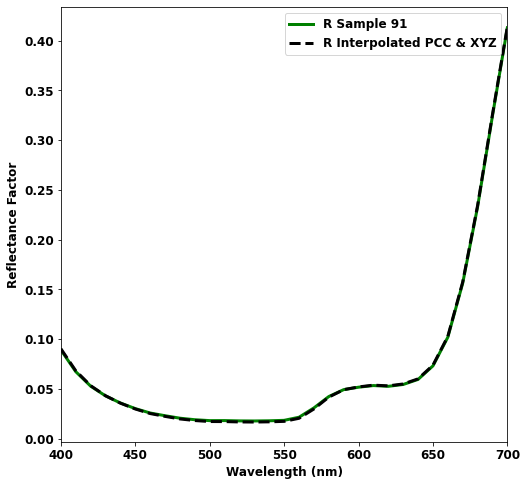

Max ΔE


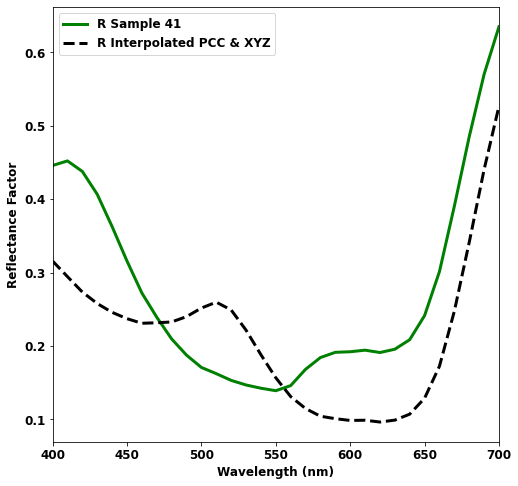

Min RMS


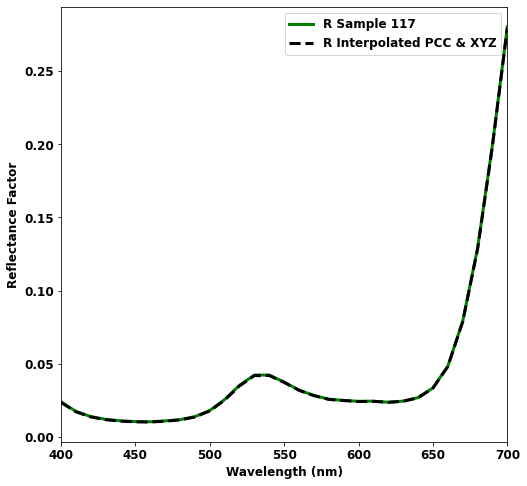

Max RMS


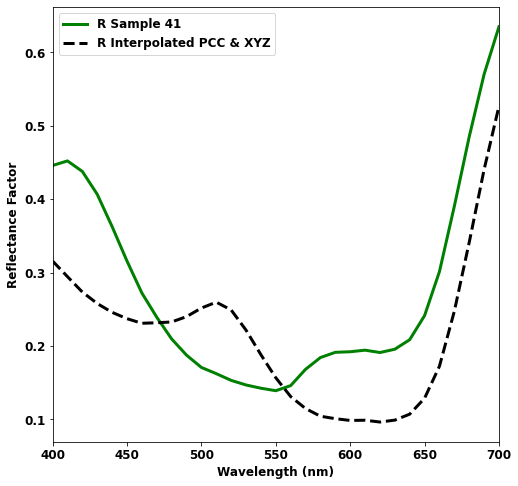

Max GFC


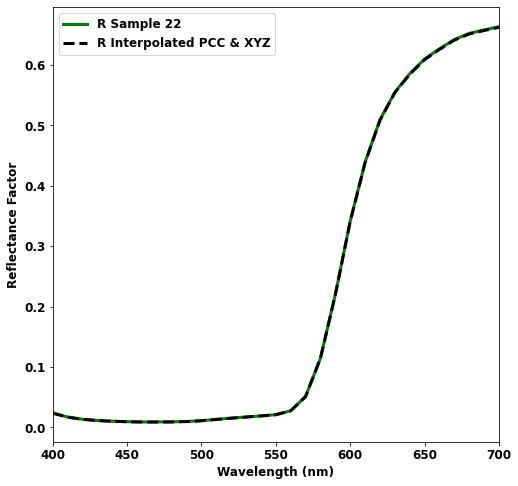

Min GFC


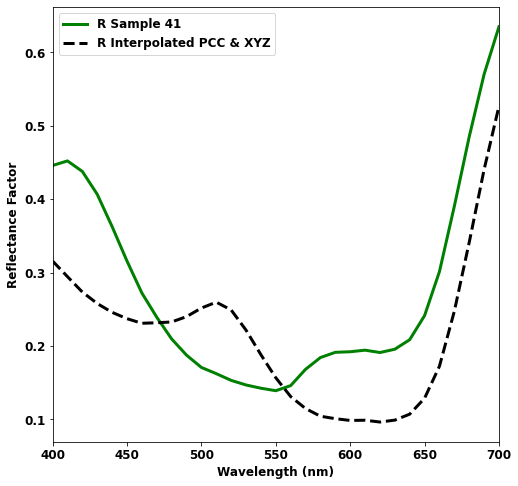

Min ΔC


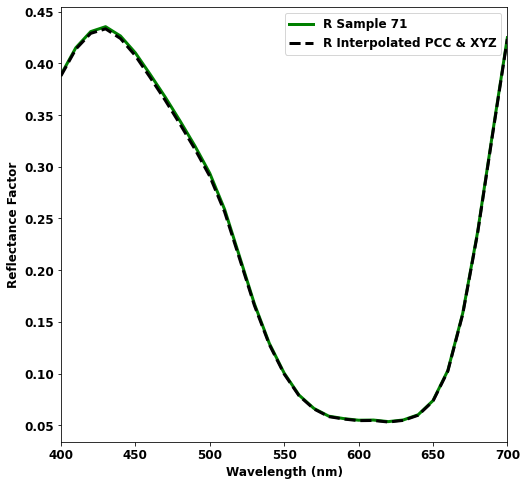

Max ΔC


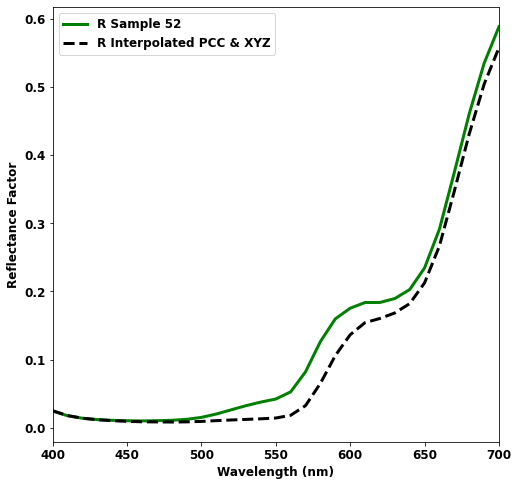

Random Sample


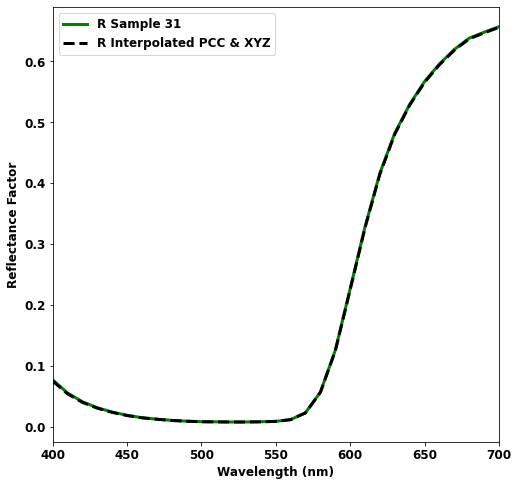

Random Sample


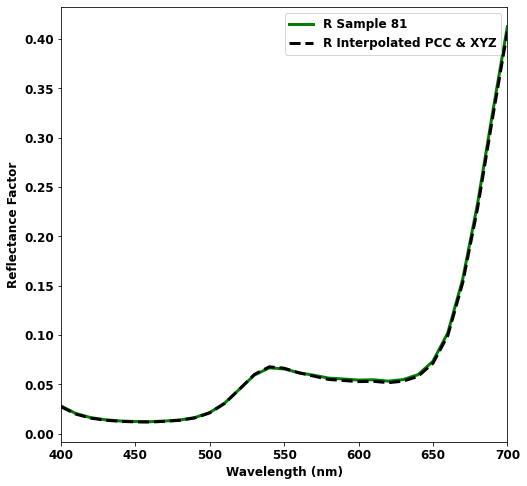

Random Sample


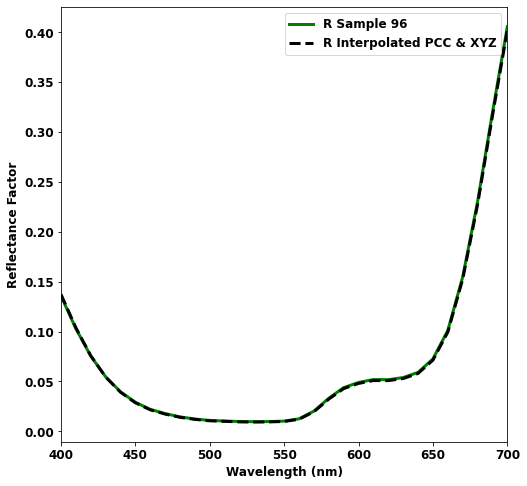

Random Sample


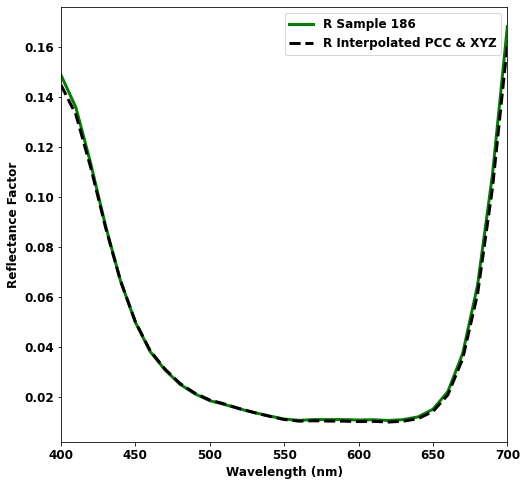

Random Sample


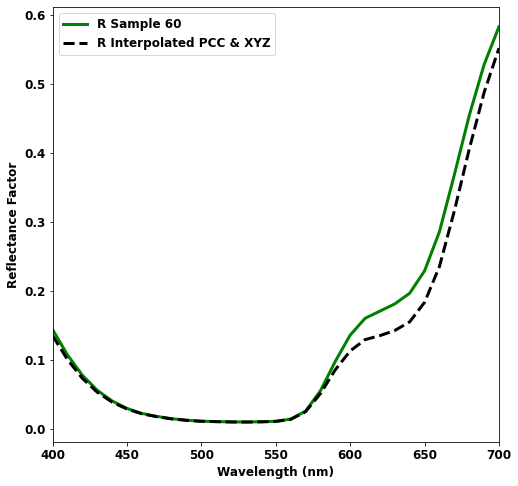

Random Sample


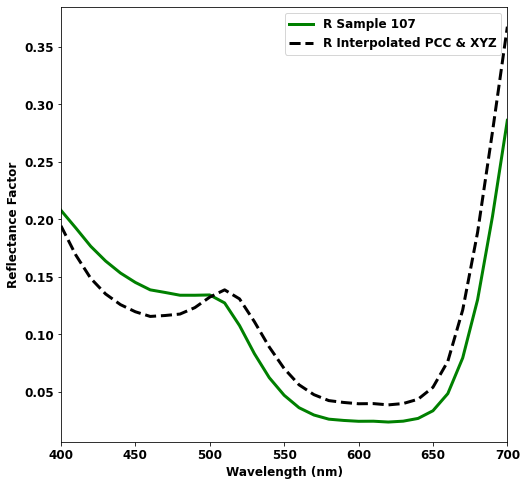

Random Sample


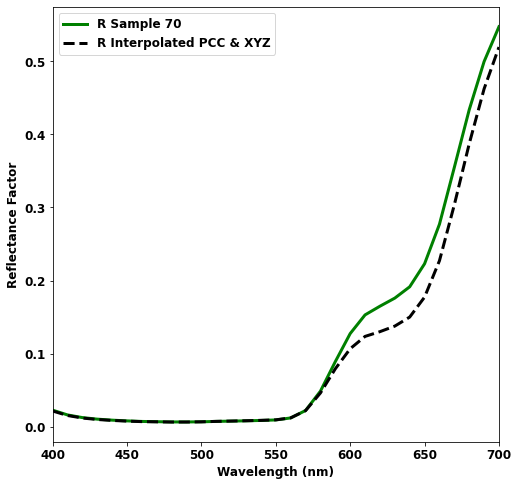

Random Sample


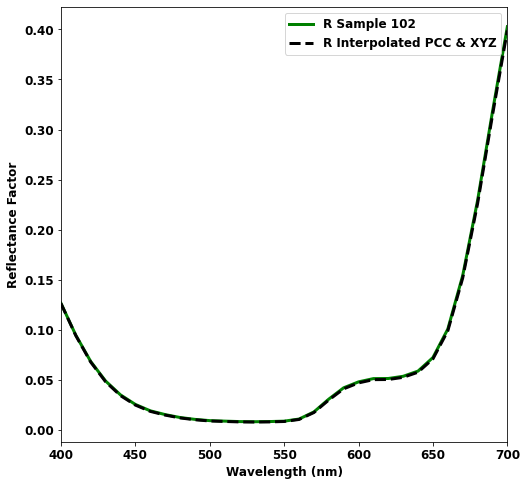


mean RMS:  0.0476953721767
mean ΔE:  2.65010303139
mean ΔC:  0.05415273986
mean GFC:  0.998716779298
Min RMS:  0.00172649703224
Max RMS:  0.558637001626
Min ΔE:  0.0182503964863
Max ΔE:  18.4713597631
Min ΔC:  0.00107679061798
Max ΔC:  0.323867620351
Min GFC:  0.963280516934
Max GFC:  0.99999994276

XYZ GOOD: 55
PCC GOOD: 112


In [14]:
count3 = 0

# Initial Value
M_RXYZ_RMS, M_RXYZ_DeltaE, M_RXYZ_DeltaC, M_RXYZ_GFC = 0, 0, 0, 0

M_RXYZ_minRMS, M_RXYZ_maxRMS = 0, 0
M_RXYZ_minRMS_no, M_RXYZ_maxRMS_no = -1, -1

M_RXYZ_minE, M_RXYZ_maxE = 0, 0
M_RXYZ_minE_no, M_RXYZ_maxE_no = -1, -1

M_RXYZ_minC, M_RXYZ_maxC = 0, 0
M_RXYZ_minC_no, M_RXYZ_maxC_no = -1, -1

M_RXYZ_minGFC, M_RXYZ_maxGFC = 0, 0
M_RXYZ_minGFC_no, M_RXYZ_maxGFC_no = -1, -1

Method_RXYZ_R = {}
Method_RXYZ_RMS = {}
Method_RXYZ_RMS_RMS = {}
Method_RXYZ_RMS_GFC = {}
Method_RXYZ_RMS_C = {}

RXYZ_out = []
RXYZ_bad = []
good_PCC = 0
good_XYZ = 0
for i in range(len(R_Samples)):
    # print(R_Samples[i])
    R_std = R_Samples[i]
    XYZ_Find = XYZ_Samples[i]
    PCC_Find = PCC_Samples[i]
    Temp = Observation(light_source, viewer, R_std)
    SP_Compare.setR1(R_std)

    DeltaE1_Inter = 500
    DeltaE2_Inter = 500
    try:
        res = XYZ_calc.getInterpolation(XYZ_Find, SP_Compare)
        res1 = res.copy()
        C_Inter = res[0]
        Mix.clear()
        Mix.add(C_Inter[0], blue_KOVERS)
        Mix.add(C_Inter[1], red_KOVERS)
        Mix.add(C_Inter[2], yellow_KOVERS)
        R_Inter = Mix.getR()
        Inter = Observation(light_source, viewer, R_Inter)
        STD = Observation(light_source, viewer, R_std)
        compare = Compare(Inter, STD)
        RMS_Inter = compare.RMS()
        DeltaE1_Inter = compare.delta_E()
    except Exception:
        DeltaE1_Inter = 500

    try:
        res = R_calc.getInterpolation(PCC_Find, SP_Compare)
        res2 = res.copy()
        C_Inter = res[0]
        Mix.clear()
        Mix.add(C_Inter[0], blue_KOVERS)
        Mix.add(C_Inter[1], red_KOVERS)
        Mix.add(C_Inter[2], yellow_KOVERS)
        R_Inter = Mix.getR()
        Inter = Observation(light_source, viewer, R_Inter)
        STD = Observation(light_source, viewer, R_std)
        compare = Compare(Inter, STD)
        RMS_Inter = compare.RMS()
        DeltaE2_Inter = compare.delta_E()
    except Exception:
        DeltaE2_Inter = 500

    if DeltaE1_Inter == 500 and DeltaE2_Inter == 500:
        continue
    elif DeltaE1_Inter < DeltaE2_Inter:
        res = res1
        good_XYZ += 1
    else:
        res = res2
        good_PCC +=1

    C_Inter = res[0]
    Mix.clear()
    Mix.add(C_Inter[0], blue_KOVERS)
    Mix.add(C_Inter[1], red_KOVERS)
    Mix.add(C_Inter[2], yellow_KOVERS)
    R_Inter = Mix.getR()
    Method_RXYZ_R[i] = R_Inter
    Inter = Observation(light_source, viewer, R_Inter)
    STD = Observation(light_source, viewer, R_std)
    compare = Compare(Inter, STD)
    RMS_Inter = compare.RMS()
    DeltaE_Inter = compare.delta_E()
    GFC_Inter = compare.GFC()
    DeltaC_Inter = mm.RMS(C_Samples[i], C_Inter)
    if MUNSELL_AS_SAMPLE:
        DeltaC_Inter = 0

    count3 += 1

    text_R = "R: " + str(R_std)
    text_RMS = "RMS: " + str(RMS_Inter)
    text_DeltaE = "ΔE: " + str(DeltaE_Inter)
    text_GFC = "GFC: " + str(GFC_Inter)
    text_C_Real = "Real C: " + str(C_Samples[i])
    text_C_Cal = "Interpolated C: " + str(C_Inter)

    Method_RXYZ_RMS[i] = DeltaE_Inter
    Method_RXYZ_RMS_RMS[i] = RMS_Inter
    Method_RXYZ_RMS_GFC[i] = GFC_Inter
    Method_RXYZ_RMS_C[i] = DeltaC_Inter

    text_all = (
        text_RMS
        + "\n"
        + text_DeltaE
        + "\n"
        + text_GFC
        + "\n"
        + text_C_Real
        + "\n"
        + text_C_Cal
        + "\n\n"
        + text_R
    )

    # Sum
    M_RXYZ_RMS = M_RXYZ_RMS + RMS_Inter
    M_RXYZ_DeltaE = M_RXYZ_DeltaE + DeltaE_Inter
    M_RXYZ_DeltaC = M_RXYZ_DeltaC + DeltaC_Inter
    M_RXYZ_GFC = M_RXYZ_GFC + GFC_Inter

    if count3 == 1:
        M_RXYZ_minRMS, M_RXYZ_maxRMS = RMS_Inter, RMS_Inter

        M_RXYZ_minE, M_RXYZ_maxE = DeltaE_Inter, DeltaE_Inter

        M_RXYZ_minC, M_RXYZ_maxC = DeltaC_Inter, DeltaC_Inter

        M_RXYZ_minGFC, M_RXYZ_maxGFC = GFC_Inter, GFC_Inter

        (
            M_RXYZ_minRMS_no,
            M_RXYZ_maxRMS_no,
            M_RXYZ_minE_no,
            M_RXYZ_maxE_no,
            M_RXYZ_minGFC_no,
            M_RXYZ_maxGFC_no,
            M_RXYZ_minC_no,
            M_RXYZ_maxC_no,
        ) = (i, i, i, i, i, i, i, i)

    if RMS_Inter < M_RXYZ_minRMS:
        M_RXYZ_minRMS = RMS_Inter
        M_RXYZ_minRMS_no = i

    if RMS_Inter > M_RXYZ_maxRMS:
        M_RXYZ_maxRMS = RMS_Inter
        M_RXYZ_maxRMS_no = i

    if DeltaE_Inter < M_RXYZ_minE:
        M_RXYZ_minE = DeltaE_Inter
        M_RXYZ_minE_no = i

    if DeltaE_Inter > M_RXYZ_maxE:
        M_RXYZ_maxE = DeltaE_Inter
        M_RXYZ_maxE_no = i

    if DeltaC_Inter < M_RXYZ_minC:
        M_RXYZ_minC = DeltaC_Inter
        M_RXYZ_minC_no = i

    if DeltaC_Inter > M_RXYZ_maxC:
        M_RXYZ_maxC = DeltaC_Inter
        M_RXYZ_maxC_no = i

    if GFC_Inter < M_RXYZ_minGFC:
        M_RXYZ_minGFC = GFC_Inter
        M_RXYZ_minGFC_no = i

    if GFC_Inter > M_RXYZ_maxGFC:
        M_RXYZ_maxGFC = GFC_Inter
        M_RXYZ_maxGFC_no = i

    if PLOT_ALL_SAMPLES:
        (p1,) = plt.plot(
            wave_length, R_std, color="green", label="R Sample " + str(i + 1)
        )
        (p2,) = plt.plot(
            wave_length, R_Inter, color="black", label="R Interpolated (XYZ)"
        )
        lines = [p1, p2]
        draw_R_style1(lines, comment=text_all)

if count2 != 0:
    # Result - Plot
    array = [
        M_RXYZ_minE_no,
        M_RXYZ_maxE_no,
        M_RXYZ_minRMS_no,
        M_RXYZ_maxRMS_no,
        M_RXYZ_maxGFC_no,
        M_RXYZ_minGFC_no,
        M_RXYZ_minC_no,
        M_RXYZ_maxC_no,
    ]
    Method_RXYZ_R_org = Method_RXYZ_R.copy()
    # draw_R_subplot_style1(R_Samples, Method_RXYZ_R, array, "PCC & XYZ", "normal")

    # Result
    M_RXYZ_RMS = M_RXYZ_RMS / count3
    M_RXYZ_DeltaE = M_RXYZ_DeltaE / count3
    M_RXYZ_DeltaC = M_RXYZ_DeltaC / count3
    M_RXYZ_GFC = M_RXYZ_GFC / count3

print()
print("mean RMS: ", M_RXYZ_RMS)
print("mean ΔE: ", M_RXYZ_DeltaE)
print("mean ΔC: ", M_RXYZ_DeltaC)
print("mean GFC: ", M_RXYZ_GFC)
print("Min RMS: ", M_RXYZ_minRMS)
print("Max RMS: ", M_RXYZ_maxRMS)
print("Min ΔE: ", M_RXYZ_minE)
print("Max ΔE: ", M_RXYZ_maxE)
print("Min ΔC: ", M_RXYZ_minC)
print("Max ΔC: ", M_RXYZ_maxC)
print("Min GFC: ", M_RXYZ_minGFC)
print("Max GFC: ", M_RXYZ_maxGFC)
print()
print("XYZ GOOD:", good_XYZ)
print("PCC GOOD:", good_PCC)

# Out of gamut samples

In [15]:
if ANALYZE_MODE:
    print("========= PCA =========")
    out_points = []
    for i in range(len(R_Samples)):
        if i in R_out:
            OBS_new = Observation(
                light_source, viewer, R_Samples[i], "", "special_black"
            )
            out_points.append(OBS_new)

    out_points = blue_points + red_points + yellow_points + out_points
    draw_CIE1931(out_points, True)
    draw_CIELab(out_points, True)

    out_points = all_points_sp2 + out_points
    draw_CIE1931(out_points, True)
    draw_CIELab(out_points, True)

    print("Bad PCA Samples")
    bad_points = []
    for i in R_bad:
        OBS_new = Observation(light_source, viewer, R_Samples[i], "", "special_gray")
        bad_points.append(OBS_new)
    bad_points = blue_points + red_points + yellow_points + bad_points
    draw_CIE1931(bad_points, True)
    draw_CIELab(bad_points, True)

    print("========= XYZ =========")
    out_points = []
    for i in range(len(R_Samples)):
        if i in XYZ_out:
            OBS_new = Observation(
                light_source, viewer, R_Samples[i], "", "special_black"
            )
            out_points.append(OBS_new)

    out_points = blue_points + red_points + yellow_points + out_points
    draw_CIE1931(out_points, True)
    draw_CIELab(out_points, True)

    out_points = all_points_sp2 + out_points
    draw_CIE1931(out_points, True)
    draw_CIELab(out_points, True)

    print("Bad XYZ Samples")
    bad_points = []
    for i in XYZ_bad:
        OBS_new = Observation(light_source, viewer, R_Samples[i], "", "special_gray")
        bad_points.append(OBS_new)
    bad_points = blue_points + red_points + yellow_points + bad_points
    draw_CIE1931(bad_points, True)
    draw_CIELab(bad_points, True)

    if dim == 2:
        _ = delaunay_plot_2d(R_calc.tri)
        for i in R_out:
            plt.plot(
                PCC_Samples[i][0],
                PCC_Samples[i][1],
                marker="v",
                color="black",
            )
        plt.show()

        _ = delaunay_plot_2d(R_calc.tri)
        for i in R_bad:
            plt.plot(
                PCC_Samples[i][0],
                PCC_Samples[i][1],
                marker="v",
                color="gray",
            )
        plt.show()

    if dim == 3:
        from mpl_toolkits.mplot3d import Axes3D
        import dill as pickle

        # %matplotlib
        import matplotlib.pyplot as plt
        fig = plt.figure()
        ax = fig.add_subplot(111, projection="3d")
        # Draw Delauny

        R_calc = Delaunay(PCC_Lookup, furthest_site=False, incremental=False,)
        points = R_calc.points
        for tr in R_calc.simplices:
            pts = points[tr, :]
            ax.plot3D(
                pts[[0, 1], 0], pts[[0, 1], 1], pts[[0, 1], 2], color="y", lw="0.1"
            )
            ax.plot3D(
                pts[[0, 2], 0], pts[[0, 2], 1], pts[[0, 2], 2], color="y", lw="0.1"
            )
            ax.plot3D(
                pts[[0, 3], 0], pts[[0, 3], 1], pts[[0, 3], 2], color="y", lw="0.1"
            )
            ax.plot3D(
                pts[[1, 2], 0], pts[[1, 2], 1], pts[[1, 2], 2], color="y", lw="0.1"
            )
            ax.plot3D(
                pts[[1, 3], 0], pts[[1, 3], 1], pts[[1, 3], 2], color="y", lw="0.1"
            )
            ax.plot3D(
                pts[[2, 3], 0], pts[[2, 3], 1], pts[[2, 3], 2], color="y", lw="0.1"
            )
        ax.scatter(points[:, 0], points[:, 1], points[:, 2], color="y")

        Mix_Lookup_PCC_plot = [
            PCC_Lookup_blue,
            PCC_Lookup_red,
            PCC_Lookup_yellow,
            PCC_Lookup_blue_red,
            PCC_Lookup_blue_yellow,
            PCC_Lookup_red_yellow,
            PCC_Lookup_blue_red_yellow,
        ]
        for mix in Mix_Lookup_PCC_plot:
            R_calc = Delaunay(mix, furthest_site=False, incremental=False,)
            points = R_calc.points
            for tr in R_calc.simplices:
                pts = points[tr, :]
                ax.plot3D(
                    pts[[0, 1], 0], pts[[0, 1], 1], pts[[0, 1], 2], color="b", lw="0.1"
                )
                ax.plot3D(
                    pts[[0, 2], 0], pts[[0, 2], 1], pts[[0, 2], 2], color="b", lw="0.1"
                )
                ax.plot3D(
                    pts[[0, 3], 0], pts[[0, 3], 1], pts[[0, 3], 2], color="b", lw="0.1"
                )
                ax.plot3D(
                    pts[[1, 2], 0], pts[[1, 2], 1], pts[[1, 2], 2], color="b", lw="0.1"
                )
                ax.plot3D(
                    pts[[1, 3], 0], pts[[1, 3], 1], pts[[1, 3], 2], color="b", lw="0.1"
                )
                ax.plot3D(
                    pts[[2, 3], 0], pts[[2, 3], 1], pts[[2, 3], 2], color="b", lw="0.1"
                )
            ax.scatter(points[:, 0], points[:, 1], points[:, 2], color="b")

        plot_save(plt)
        pickle.dump(fig, open('FigureObject.fig.pickle', 'wb')) # This is for Python 3 - py2 may need `file` instead of `open`
        plt.show()
        # End Draw

    if dim == 2:
        _ = delaunay_plot_2d(R_calc.tri)
        for i in range(len(PCC_Samples)):
            plt.plot(
                PCC_Samples[i][0],
                PCC_Samples[i][1],
                marker="v",
                color="red",
            )
        plt.show()

# Showing Results

+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+---+
| Me | Di |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    | S |
| th | me | To | in | Me | Me | Me | Me | Mi | Ma | Mi | Ma | Mi | Ma | Mi | Ma | ST | ST | ST | T |
| od | ns | ta | -g | an | an | an | an | n  | x  | n  | x  | n  | x  | n  | x  | D  | D  | D  | D |
| na | io | l  | am | RM | ΔE | ΔC | GF | RM | RM | ΔE | ΔE | ΔC | ΔC | GF | GF | RM | ΔE | ΔC | G |
| me | n  |    | ut | S  |    |    | C  | S  | S  |    |    |    |    | C  | C  | S  |    |    | F |
|    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    | C |
+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+---+
| Pr |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |   |
| in |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |

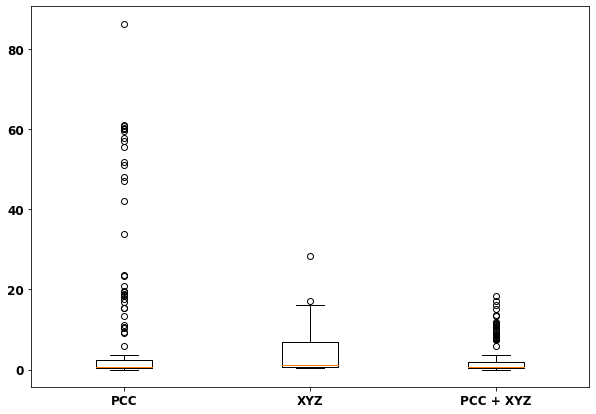

In [16]:
pr = precise

M_R_RMS = round(M_R_RMS, pr)
M_R_DeltaE = round(M_R_DeltaE, pr)
M_R_DeltaC = round(M_R_DeltaC, pr)
M_R_GFC = round(M_R_GFC, pr)
M_R_RMS_std = round(np.std(list(Method_PCC_RMS_RMS.values())),pr)
M_R_DeltaE_std = round(np.std(list(Method_PCC_RMS.values())),pr)
M_R_DeltaC_std = round(np.std(list(Method_PCC_RMS_C.values())),pr)
M_R_GFC_std = round(np.std(list(Method_PCC_RMS_GFC.values())),pr)
M_R_minRMS = round(M_R_minRMS, pr)
M_R_maxRMS = round(M_R_maxRMS, pr)
M_R_minE = round(M_R_minE, pr)
M_R_maxE = round(M_R_maxE, pr)
M_R_minC = round(M_R_minC, pr)
M_R_maxC = round(M_R_maxC, pr)
M_R_minGFC = round(M_R_minGFC, pr)
M_R_maxGFC = round(M_R_maxGFC, pr)

M_XYZ_RMS = round(M_XYZ_RMS, pr)
M_XYZ_DeltaE = round(M_XYZ_DeltaE, pr)
M_XYZ_DeltaC = round(M_XYZ_DeltaC, pr)
M_XYZ_GFC = round(M_XYZ_GFC, pr)
M_XYZ_DeltaE_std = round(np.std(list(Method_XYZ_RMS.values())),pr)
M_XYZ_DeltaC_std = round(np.std(list(Method_XYZ_RMS_C.values())),pr)
M_XYZ_RMS_std = round(np.std(list(Method_XYZ_RMS_RMS.values())),pr)
M_XYZ_GFC_std = round(np.std(list(Method_XYZ_RMS_GFC.values())),pr)
M_XYZ_minRMS = round(M_XYZ_minRMS, pr)
M_XYZ_maxRMS = round(M_XYZ_maxRMS, pr)
M_XYZ_minE = round(M_XYZ_minE, pr)
M_XYZ_maxE = round(M_XYZ_maxE, pr)
M_XYZ_minC = round(M_XYZ_minC, pr)
M_XYZ_maxC = round(M_XYZ_maxC, pr)
M_XYZ_minGFC = round(M_XYZ_minGFC, pr)
M_XYZ_maxGFC = round(M_XYZ_maxGFC, pr)

M_RXYZ_RMS = round(M_RXYZ_RMS, pr)
M_RXYZ_DeltaE = round(M_RXYZ_DeltaE, pr)
M_RXYZ_DeltaC = round(M_RXYZ_DeltaC, pr)
M_RXYZ_GFC = round(M_RXYZ_GFC, pr)
M_RXYZ_DeltaE_std = round(np.std(list(Method_RXYZ_RMS.values())),pr)
M_RXYZ_DeltaC_std = round(np.std(list(Method_RXYZ_RMS_C.values())),pr)
M_RXYZ_RMS_std = round(np.std(list(Method_RXYZ_RMS_RMS.values())),pr)
M_RXYZ_GFC_std = round(np.std(list(Method_RXYZ_RMS_GFC.values())),pr)
M_RXYZ_minRMS = round(M_RXYZ_minRMS, pr)
M_RXYZ_maxRMS = round(M_RXYZ_maxRMS, pr)
M_RXYZ_minE = round(M_RXYZ_minE, pr)
M_RXYZ_maxE = round(M_RXYZ_maxE, pr)
M_RXYZ_minC = round(M_RXYZ_minC, pr)
M_RXYZ_maxC = round(M_RXYZ_maxC, pr)
M_RXYZ_minGFC = round(M_RXYZ_minGFC, pr)
M_RXYZ_maxGFC = round(M_RXYZ_maxGFC, pr)

Table = []
Table.append(
    [
        "Method name",
        "Dimension",
        "Total",
        "in-gamut",
        "Mean RMS",
        "Mean ΔE",
        "Mean ΔC",
        "Mean GFC",
        "Min RMS",
        "Max RMS",
        "Min ΔE",
        "Max ΔE",
        "Min ΔC",
        "Max ΔC",
        "Min GFC",
        "Max GFC",
        "STD RMS",
        "STD ΔE",
        "STD ΔC",
        "STD GFC",
    ]
)

Table.append(
    [
        "Principal Component Coordinates",
        dim,
        total_count,
        count1,
        M_R_RMS,
        M_R_DeltaE,
        M_R_DeltaC,
        M_R_GFC,
        M_R_minRMS,
        M_R_maxRMS,
        M_R_minE,
        M_R_maxE,
        M_R_minC,
        M_R_maxC,
        M_R_minGFC,
        M_R_maxGFC,
        M_R_RMS_std,
        M_R_DeltaE_std,
        M_R_DeltaC_std,
        M_R_GFC_std,
    ]
)

Table.append(
    [
        "XYZ",
        "3",
        total_count,
        count2,
        M_XYZ_RMS,
        M_XYZ_DeltaE,
        M_XYZ_DeltaC,
        M_XYZ_GFC,
        M_XYZ_minRMS,
        M_XYZ_maxRMS,
        M_XYZ_minE,
        M_XYZ_maxE,
        M_XYZ_minC,
        M_XYZ_maxC,
        M_XYZ_minGFC,
        M_XYZ_maxGFC,
        M_XYZ_RMS_std,
        M_XYZ_DeltaE_std,
        M_XYZ_DeltaC_std,
        M_XYZ_GFC_std,
    ]
)

Table.append(
    [
        "PCC & XYZ",
        "?",
        total_count,
        count3,
        M_RXYZ_RMS,
        M_RXYZ_DeltaE,
        M_RXYZ_DeltaC,
        M_RXYZ_GFC,
        M_RXYZ_minRMS,
        M_RXYZ_maxRMS,
        M_RXYZ_minE,
        M_RXYZ_maxE,
        M_RXYZ_minC,
        M_RXYZ_maxC,
        M_RXYZ_minGFC,
        M_RXYZ_maxGFC,
        M_RXYZ_RMS_std,
        M_RXYZ_DeltaE_std,
        M_RXYZ_DeltaC_std,
        M_RXYZ_GFC_std,
    ]
)

output.save(Table, "Result")

data_delta_E = []
data_delta_E.append(list(Method_PCC_RMS.values()))
data_delta_E.append(list(Method_XYZ_RMS.values()))
data_delta_E.append(list(Method_RXYZ_RMS.values()))
box_plot(data_delta_E)

# Stop Timer

In [17]:
print("Program execution takes %s seconds" % (time.time() - program_time))

Program execution takes 320.8837637901306 seconds
